# Deep Neural Networks From Scratch: An Interactive Guide

By: Zack Malone, Data Scientist / Cloud Data Engineer 

## Introduction

Welcome to this comprehensive guide on understanding deep neural networks! This notebook is designed to provide both technical and intuitive explanations of how neural networks function under the hood. We'll build a neural network from scratch, explore the impact of different hyperparameters, and discuss best practices for neural network design.

Whether you're a technical practitioner looking to deepen your understanding or someone new to the field wanting to grasp the fundamental concepts, this guide aims to serve as a valuable resource.

Let's begin our journey into the world of deep neural networks!

## Table of Contents

1. [The Building Blocks: Neurons and Activation Functions](#1-the-building-blocks-neurons-and-activation-functions)
2. [Forward Propagation: How Neural Networks Make Predictions](#2-forward-propagation-how-neural-networks-make-predictions)
3. [Backpropagation: How Neural Networks Learn](#3-backpropagation-how-neural-networks-learn)
4. [Building a Neural Network from Scratch](#4-building-a-neural-network-from-scratch)
5. [Hyperparameters and Their Impact](#5-hyperparameters-and-their-impact)
6. [Best Practices for Neural Network Design](#6-best-practices-for-neural-network-design)
7. [Visualizing Neural Network Learning](#7-visualizing-neural-network-learning)
8. [Advanced Topics and Extensions](#8-advanced-topics-and-extensions)

Let's import the necessary libraries for our tutorial:


In [22]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import pandas as pd
from IPython.display import HTML, display

# Set random seed for reproducibility
np.random.seed(42)

# Configure plots
# print("Available styles:", plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid", font_scale=1.2)


## 1. The Building Blocks: Neurons and Activation Functions

### The Biological Inspiration

Neural networks draw inspiration from the human brain. In our brains, neurons receive signals from other neurons through dendrites, process these signals in the cell body, and transmit output signals through axons to other neurons. Similarly, artificial neurons (or "units") receive inputs, apply weights to these inputs, sum them up, and pass the result through an activation function to produce an output.

### The Mathematical Model of a Neuron

Let's visualize and implement a single neuron:


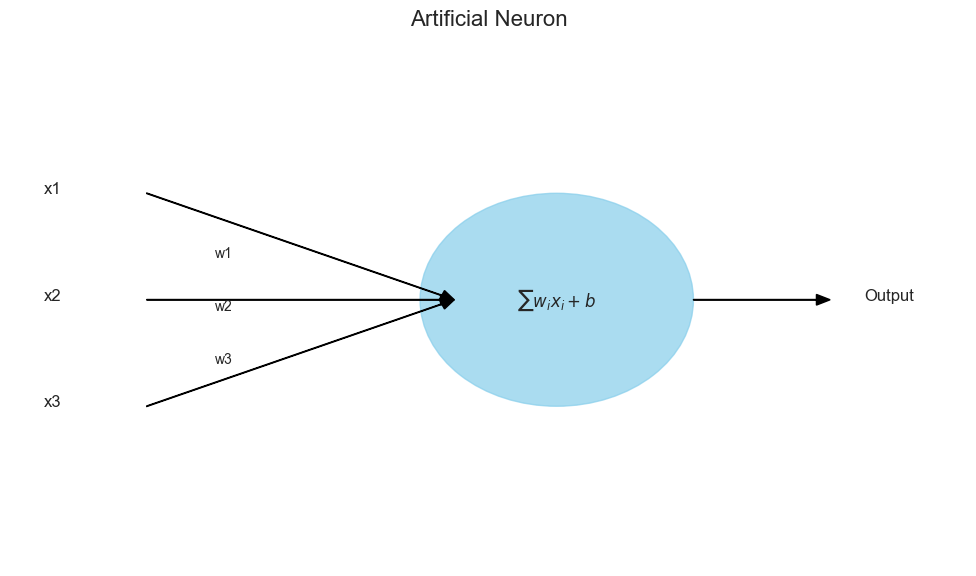

In [23]:

def plot_neuron():
    """Visualize a single artificial neuron"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Draw neuron body
    circle = plt.Circle((0.5, 0.5), 0.2, fill=True, color='skyblue', alpha=0.7)
    ax.add_patch(circle)
    
    # Draw inputs
    input_coords = [
        (-0.1, 0.7), 
        (-0.1, 0.5),
        (-0.1, 0.3)
    ]
    
    for i, (x, y) in enumerate(input_coords):
        ax.arrow(x, y, 0.45, 0.5 - y, head_width=0.02, head_length=0.02, 
                fc='black', ec='black', length_includes_head=True)
        ax.text(x - 0.15, y, f'x{i+1}', fontsize=12)
        ax.text(x + 0.1, y + (0.5 - y)/2 - 0.02, f'w{i+1}', fontsize=10)
    
    # Draw output
    ax.arrow(0.7, 0.5, 0.2, 0, head_width=0.02, head_length=0.02, 
            fc='black', ec='black', length_includes_head=True)
    ax.text(0.95, 0.5, 'Output', fontsize=12)
    
    # Add formula inside neuron
    ax.text(0.5, 0.5, r'$\sum w_i x_i + b$', 
            horizontalalignment='center', 
            verticalalignment='center', 
            fontsize=12)
    
    # Set limits and remove axes
    ax.set_xlim(-0.3, 1.1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    plt.title('Artificial Neuron', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_neuron()


### The Mathematical Operation

A neuron performs the following computation:

1. It multiplies each input by a corresponding weight
2. It sums these weighted inputs
3. It adds a bias term
4. It applies an activation function to the result

Mathematically:

$$output = f\left(\sum_{i=1}^{n} w_i \cdot x_i + b\right)$$

Where:
- $x_i$ are the inputs
- $w_i$ are the weights
- $b$ is the bias
- $f$ is the activation function

Let's implement a simple neuron:


In [24]:

class Neuron:
    def __init__(self, n_inputs):
        """
        Initialize a single neuron with random weights and zero bias
        
        Parameters:
        -----------
        n_inputs : int
            Number of input features
        """
        # Initialize weights with values from a normal distribution 
        # divided by sqrt(n_inputs) for better weight scaling
        self.weights = np.random.randn(n_inputs) / np.sqrt(n_inputs)
        self.bias = 0
        
    def forward(self, inputs, activation_function):
        """
        Compute the output of the neuron
        
        Parameters:
        -----------
        inputs : array-like
            Input values (features)
        activation_function : function
            The activation function to apply
            
        Returns:
        --------
        float
            The activated output of the neuron
        """
        # Calculate the weighted sum of inputs plus bias
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        
        # Apply activation function and return result
        return activation_function(weighted_sum)


### Activation Functions

Activation functions introduce non-linearity into the neural network, allowing it to learn complex patterns. Without them, neural networks would just be linear transformations, no matter how many layers they have.

Let's implement and visualize some common activation functions:


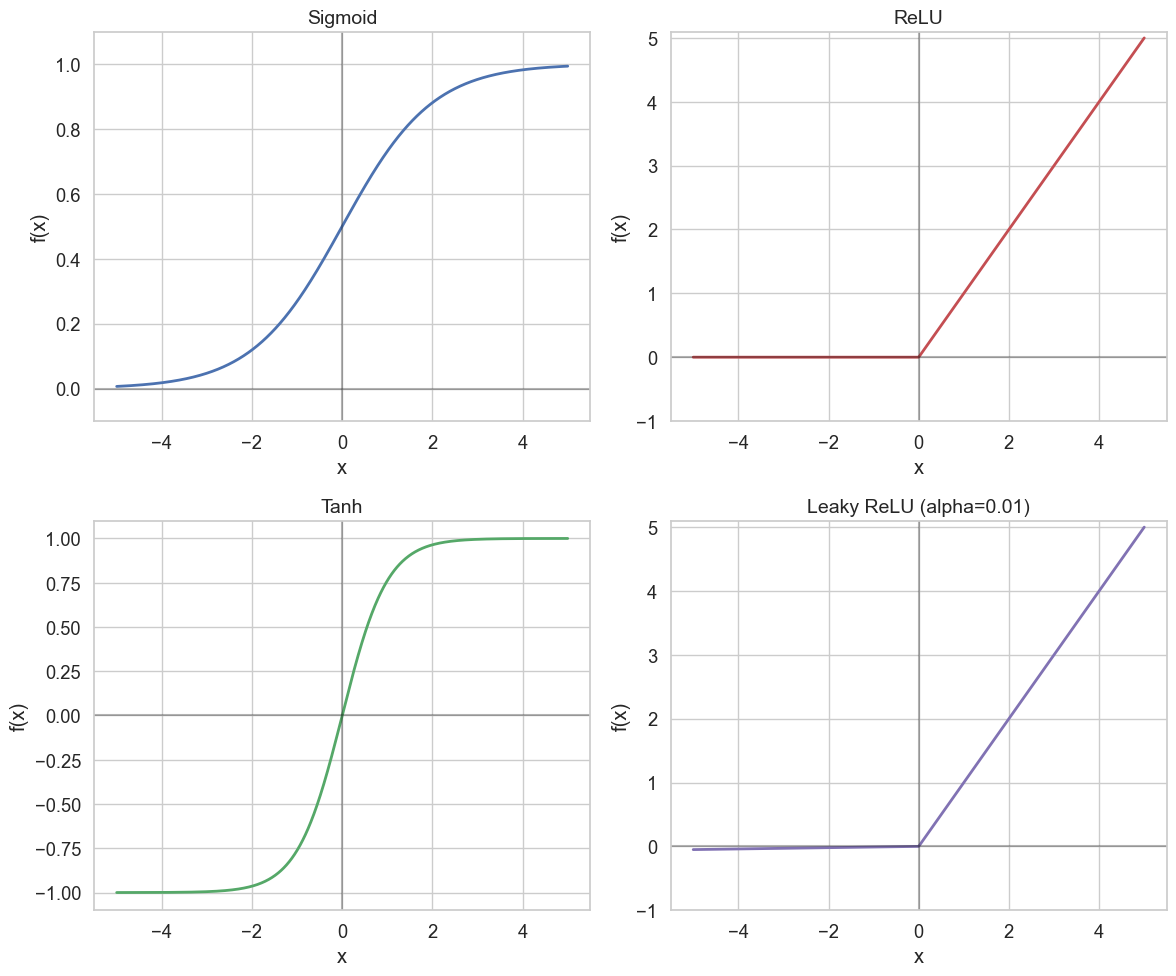

In [25]:


def sigmoid(x):
    """
    Sigmoid activation function: maps any value to a number between 0 and 1
    
    Parameter:
    ----------
    x : float or array
        Input value(s)
        
    Returns:
    --------
    float or array
        Output value(s) between 0 and 1
    """
    return 1 / (1 + np.exp(-x))

def relu(x):
    """
    ReLU (Rectified Linear Unit) activation function:
    returns x if x > 0, otherwise returns 0
    
    Parameter:
    ----------
    x : float or array
        Input value(s)
        
    Returns:
    --------
    float or array
        Output value(s) with negative inputs set to 0
    """
    return np.maximum(0, x)

def tanh(x):
    """
    Hyperbolic tangent activation function:
    maps any value to a number between -1 and 1
    
    Parameter:
    ----------
    x : float or array
        Input value(s)
        
    Returns:
    --------
    float or array
        Output value(s) between -1 and 1
    """
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    """
    Leaky ReLU activation function:
    returns x if x > 0, otherwise returns alpha * x
    
    Parameters:
    -----------
    x : float or array
        Input value(s)
    alpha : float, default=0.01
        Slope of the function for negative inputs
        
    Returns:
    --------
    float or array
        Output value(s) with negative inputs multiplied by alpha
    """
    return np.maximum(alpha * x, x)

def plot_activation_functions():
    """Plot common activation functions to visualize their behavior"""
    x = np.linspace(-5, 5, 1000)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # Sigmoid
    axs[0, 0].plot(x, sigmoid(x), 'b-', linewidth=2)
    axs[0, 0].set_title('Sigmoid', fontsize=14)
    axs[0, 0].grid(True)
    axs[0, 0].set_ylim(-0.1, 1.1)
    axs[0, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axs[0, 0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # ReLU
    axs[0, 1].plot(x, relu(x), 'r-', linewidth=2)
    axs[0, 1].set_title('ReLU', fontsize=14)
    axs[0, 1].grid(True)
    axs[0, 1].set_ylim(-1, 5.1)
    axs[0, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axs[0, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Tanh
    axs[1, 0].plot(x, tanh(x), 'g-', linewidth=2)
    axs[1, 0].set_title('Tanh', fontsize=14)
    axs[1, 0].grid(True)
    axs[1, 0].set_ylim(-1.1, 1.1)
    axs[1, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axs[1, 0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Leaky ReLU
    axs[1, 1].plot(x, leaky_relu(x), 'm-', linewidth=2)
    axs[1, 1].set_title('Leaky ReLU (alpha=0.01)', fontsize=14)
    axs[1, 1].grid(True)
    axs[1, 1].set_ylim(-1, 5.1)
    axs[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axs[1, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    for ax in axs.flat:
        ax.set(xlabel='x', ylabel='f(x)')
    
    plt.tight_layout()
    plt.show()

plot_activation_functions()


### Activation Function Characteristics and Use Cases

| Activation | Range | Characteristics | Common Use Cases |
|------------|-------|-----------------|------------------|
| Sigmoid | (0, 1) | Smooth, differentiable, outputs can be interpreted as probabilities | Output layer for binary classification |
| ReLU | [0, ∞) | Fast to compute, helps solve vanishing gradient, sparse activation | Hidden layers in deep networks, especially CNNs |
| Tanh | (-1, 1) | Zero-centered, stronger gradients than sigmoid | Hidden layers, especially in RNNs |
| Leaky ReLU | (-∞, ∞) | Prevents "dying ReLU" problem with small gradient for negative inputs | Alternative to ReLU in deep networks |

Let's discuss the pros and cons of these activation functions:

**Sigmoid:**
- **Pros**: Smooth gradient, outputs bounded between 0 and 1 (probabilistic interpretation)
- **Cons**: Suffers from vanishing gradient problem for very positive or negative inputs, outputs not zero-centered

**ReLU:**
- **Pros**: Computationally efficient, helps mitigate the vanishing gradient problem, induces sparsity
- **Cons**: Can "die" during training (neurons that get stuck at always outputting 0)

**Tanh:**
- **Pros**: Zero-centered outputs, stronger gradients than sigmoid
- **Cons**: Still suffers from vanishing gradient problem

**Leaky ReLU:**
- **Pros**: Prevents "dying ReLU" problem, all the benefits of ReLU
- **Cons**: Additional hyperparameter (alpha)

## 2. Forward Propagation: How Neural Networks Make Predictions

### The Architecture of a Neural Network

Neural networks consist of layers of neurons. Each layer receives inputs from the previous layer, processes them, and passes outputs to the next layer.

Let's visualize a simple neural network architecture:

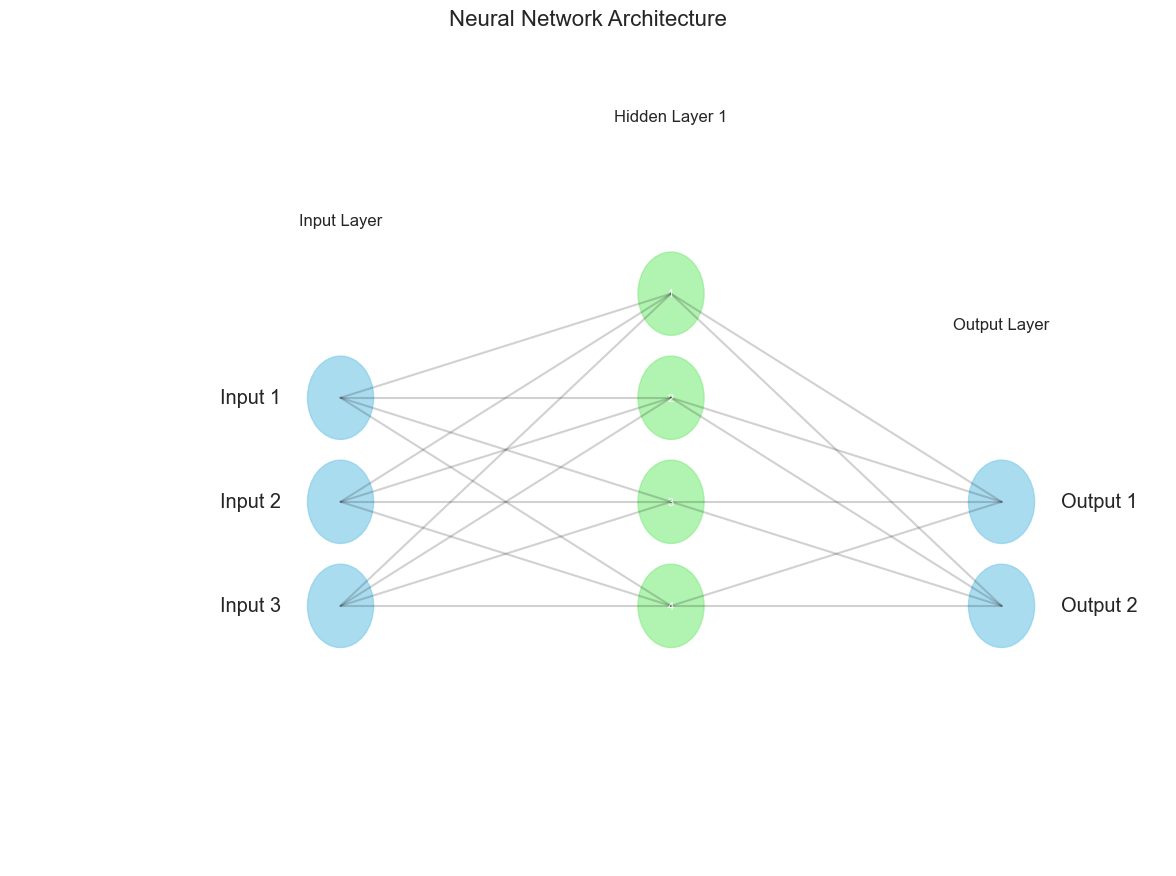

In [26]:

def plot_neural_network(layer_sizes):
    """
    Visualize a neural network architecture
    
    Parameter:
    ----------
    layer_sizes : list
        Number of neurons in each layer
    """
    fig, ax = plt.subplots(figsize=(12, 9))
    
    # Set spacing parameters
    n_layers = len(layer_sizes)
    v_spacing = 0.25
    h_spacing = 1
    
    # Draw neurons for each layer
    for l, layer_size in enumerate(layer_sizes):
        for i in range(layer_size):
            x = l * h_spacing + 0.5
            y = (layer_size - i - 0.5) * v_spacing + 0.5
            
            circle = plt.Circle((x, y), 0.1, fill=True, 
                              color='skyblue' if l == 0 or l == n_layers-1 else 'lightgreen', 
                              alpha=0.7)
            ax.add_patch(circle)
            
            # Add neuron label
            if l == 0:
                ax.text(x-0.18, y, f'Input {i+1}', ha='right', va='center')
            elif l == n_layers-1:
                ax.text(x+0.18, y, f'Output {i+1}', ha='left', va='center')
            else:
                ax.text(x, y, f'{i+1}', ha='center', va='center', fontsize=8, color='white')
    
    # Draw layer labels
    for l, layer_size in enumerate(layer_sizes):
        x = l * h_spacing + 0.5
        y = (layer_sizes[l] * v_spacing) + 0.8
        
        if l == 0:
            label = 'Input Layer'
        elif l == n_layers-1:
            label = 'Output Layer'
        else:
            label = f'Hidden Layer {l}'
        
        ax.text(x, y, label, ha='center', va='center', fontsize=12)
    
    # Draw connections between neurons
    for l in range(n_layers - 1):
        for i in range(layer_sizes[l]):
            for j in range(layer_sizes[l + 1]):
                x1 = l * h_spacing + 0.5
                y1 = (layer_sizes[l] - i - 0.5) * v_spacing + 0.5
                x2 = (l + 1) * h_spacing + 0.5
                y2 = (layer_sizes[l+1] - j - 0.5) * v_spacing + 0.5
                
                ax.plot([x1, x2], [y1, y2], 'k-', alpha=0.2)
    
    # Set limits and remove axes
    max_height = max(layer_sizes) * v_spacing + 1
    ax.set_xlim(-0.5, (n_layers - 1) * h_spacing + 1)
    ax.set_ylim(0, max_height)
    ax.axis('off')
    
    plt.title('Neural Network Architecture', fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize a network with 3 inputs, 4 hidden neurons, and 2 outputs
plot_neural_network([3, 4, 2])


### Forward Propagation: Step by Step

Forward propagation is the process by which input data flows through the network to produce an output. Let's break it down:

1. The input layer receives the raw features
2. Each subsequent layer:
   - Takes the outputs from the previous layer as inputs
   - Computes a weighted sum of these inputs plus a bias for each neuron
   - Applies an activation function to these weighted sums
3. The output layer produces the final predictions

Let's implement forward propagation for a simple neural network:

In [27]:

class NeuralNetwork:
    def __init__(self, layer_sizes):
        """
        Initialize a neural network with the given layer sizes
        
        Parameter:
        ----------
        layer_sizes : list
            Number of neurons in each layer (including input and output layers)
        """
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        
        # Initialize weights and biases
        self.weights = []
        self.biases = []
        
        # For each pair of adjacent layers
        for i in range(self.num_layers - 1):
            # Initialize weights with Xavier/Glorot initialization
            # This scales weights based on the number of input and output connections
            # to help maintain variance across layers
            scale = np.sqrt(2 / (layer_sizes[i] + layer_sizes[i+1]))
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]) * scale)
            
            # Initialize biases to zero
            self.biases.append(np.zeros(layer_sizes[i+1]))
    
    def forward(self, X, activation_function, output_activation=None):
        """
        Perform forward propagation through the network
        
        Parameters:
        -----------
        X : array-like
            Input data, shape (n_samples, n_features)
        activation_function : function
            Activation function for hidden layers
        output_activation : function, default=None
            Activation function for output layer
            If None, uses the same activation as hidden layers
            
        Returns:
        --------
        tuple
            (activations, network_cache)
            - activations: list of activations at each layer
            - network_cache: cache of intermediate values needed for backpropagation
        """
        # Make sure X is a 2D array (samples × features)
        if X.ndim == 1:
            X = X.reshape(1, -1)
            
        # Store all activations and intermediate values for backpropagation
        activations = [X]  # List to store activations for each layer
        pre_activations = []  # List to store pre-activation values (z)
        
        # Forward propagate through each layer
        current_activation = X
        
        for i in range(self.num_layers - 1):
            # Compute weighted sum of inputs plus bias
            z = np.dot(current_activation, self.weights[i]) + self.biases[i]
            pre_activations.append(z)
            
            # Apply activation function
            # Use output_activation for the last layer if provided
            if i == self.num_layers - 2 and output_activation is not None:
                current_activation = output_activation(z)
            else:
                current_activation = activation_function(z)
                
            activations.append(current_activation)
        
        # Store the network state for backpropagation
        network_cache = {
            'activations': activations,
            'pre_activations': pre_activations
        }
        
        return activations[-1], network_cache


Let's visualize the forward propagation process:


In [28]:
# # def visualize_forward_propagation():
#     """Visualize the forward propagation process with a step-by-step animation"""
#     # Create a simple dataset for visualization
#     X = np.array([[0.5, 0.1]])  # Example input
    
#     # Create a small neural network
#     nn = NeuralNetwork([2, 3, 1])
#     # Set some specific weights and biases for clearer visualization
#     nn.weights = [
#         np.array([[0.2, 0.3, 0.1], [0.3, 0.5, 0.2]]),  # First layer weights
#         np.array([[0.4], [0.1], [0.5]])  # Second layer weights
#     ]
#     nn.biases = [
#         np.array([0.1, 0.2, 0.1]),  # First layer biases
#         np.array([0.2])  # Second layer biases
#     ]
    
#     # Perform forward pass
#     output, cache = nn.forward(X, sigmoid, sigmoid)
    
#     # Set up the figure for animation
#     fig, ax = plt.subplots(figsize=(10, 6))
#     plt.close()  # Don't display the figure yet
    
#     network_structure = [2, 3, 1]
#     v_spacing = 0.25
#     h_spacing = 1
    
#     def draw_network(frame):
#         ax.clear()
        
#         # Draw neurons for each layer
#         neuron_positions = []
#         for l, layer_size in enumerate(network_structure):
#             layer_positions = []
#             for i in range(layer_size):
#                 x = l * h_spacing + 0.5
#                 y = (layer_size - i - 0.5) * v_spacing + 0.5
                
#                 # Determine fill color based on animation frame
#                 if frame == 0:
#                     # Initial state - all neurons are inactive
#                     fill_color = 'lightgray'
#                 elif l == 0 and frame >= 1:
#                     # Input layer activation
#                     fill_color = 'skyblue'
#                     intensity = min(1.0, X[0, i] + 0.3)  # Scale for visibility
#                     fill_color = (0.5, 0.8, intensity)
#                 elif l == 1 and frame >= 2:
#                     # Hidden layer activation
#                     intensity = min(1.0, cache['activations'][1][0, i] + 0.3)
#                     fill_color = (0.5, intensity, 0.5)
#                 elif l == 2 and frame >= 3:
#                     # Output layer activation
#                     intensity = min(1.0, output[0, i] + 0.3)
#                     fill_color = (intensity, 0.5, 0.5)
#                 else:
#                     fill_color = 'lightgray'
                
#                 circle = plt.Circle((x, y), 0.1, fill=True, color=fill_color, alpha=0.7)
#                 ax.add_patch(circle)
#                 layer_positions.append((x, y))
                
#                 # Add values inside neurons
#                 if frame > 0:
#                     if l == 0:
#                         ax.text(x, y, f'{X[0, i]:.2f}', ha='center', va='center', fontsize=8)
#                     elif l == 1 and frame >= 2:
#                         ax.text(x, y, f'{cache["activations"][1][0, i]:.2f}', ha='center', va='center', fontsize=8)
#                     elif l == 2 and frame >= 3:
#                         ax.text(x, y, f'{output[0, i]:.2f}', ha='center', va='center', fontsize=8)
            
#             neuron_positions.append(layer_positions)
        
#         # Draw connections between neurons
#         for l in range(len(network_structure) - 1):
#             for i in range(network_structure[l]):
#                 for j in range(network_structure[l + 1]):
#                     x1, y1 = neuron_positions[l][i]
#                     x2, y2 = neuron_positions[l+1][j]
                    
#                     # Determine line color and width based on animation frame and weight value
#                     if (l == 0 and frame >= 1) or (l == 1 and frame >= 2):
#                         weight = nn.weights[l][i, j]
#                         # Scale weight for visualization
#                         line_width = 0.5 + abs(weight) * 2
#                         alpha = 0.7
#                         if weight > 0:
#                             line_color = 'green'
#                         else:
#                             line_color = 'red'
#                     else:
#                         line_width = 0.5
#                         alpha = 0.2
#                         line_color = 'black'
                    
#                     line = ax.plot([x1, x2], [y1, y2], color=line_color, alpha=alpha, linewidth=line_width)[0]
                    
#                     # Add weight label if connection is active
#                     if (l == 0 and frame >= 1) or (l == 1 and frame >= 2):
#                         weight = nn.weights[l][i, j]
#                         midpoint_x = (x1 + x2) / 2
#                         midpoint_y = (y1 + y2) / 2
#                         ax.text(midpoint_x, midpoint_y, f'{weight:.2f}', 
#                                 ha='center', va='center', fontsize=7, 
#                                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
#         # Set limits and remove axes
#         max_height = max(network_structure) * v_spacing + 1
#         ax.set_xlim(-0.5, (len(network_structure) - 1) * h_spacing + 1)
#         ax.set_ylim(0, max_height)
#         ax.axis('off')
        
#         # Add titles based on frame
#         if frame == 0:
#             ax.set_title('Initial Neural Network State', fontsize=14)
#         elif frame == 1:
#             ax.set_title('Step 1: Input Values Received', fontsize=14)
#         elif frame == 2:
#             ax.set_title('Step 2: Hidden Layer Computation', fontsize=14)
#         elif frame == 3:
#             ax.set_title('Step 3: Output Layer Computation', fontsize=14)
#         elif frame == 4:
#             # Add extra details in the final frame
#             ax.set_title('Complete Forward Propagation Path', fontsize=14)
            
#             # Add calculation detail for first hidden neuron
#             calc_x = -0.2
#             calc_y = max_height - 0.2
#             i, j = 0, 0  # First hidden neuron
            
#             # Formula for the first hidden neuron
#             w1 = nn.weights[0][0, j]
#             w2 = nn.weights[0][1, j]
#             b = nn.biases[0][j]
#             x1, x2 = X[0, 0], X[0, 1]
            
#             formula = f"Hidden[1] = sigmoid({w1:.2f}×{x1:.2f} + {w2:.2f}×{x2:.2f} + {b:.2f})"
#             result = f"= sigmoid({w1*x1:.2f} + {w2*x2:.2f} + {b:.2f}) = sigmoid({w1*x1 + w2*x2 + b:.2f}) = {sigmoid(w1*x1 + w2*x2 + b):.4f}"
            
#             ax.text(calc_x, calc_y, formula, ha='left', va='top', fontsize=10,
#                    bbox=dict(facecolor='lightyellow', alpha=0.9, boxstyle='round,pad=0.5'))
#             ax.text(calc_x, calc_y-0.15, result, ha='left', va='top', fontsize=10,
#                    bbox=dict(facecolor='lightyellow', alpha=0.9, boxstyle='round,pad=0.5'))
            
#     # Create animation
#     frames = 5  # 0: Initial, 1: Input, 2: Hidden, 3: Output, 4: Final with details
#     anim = FuncAnimation(fig, draw_network, frames=frames, interval=1500, blit=False)
    
#     # Display the animation
#     return HTML(anim.to_html5_video())

# # Display the forward propagation animation (for mac requires brew install ffmpeg)
# # visualize_forward_propagation()

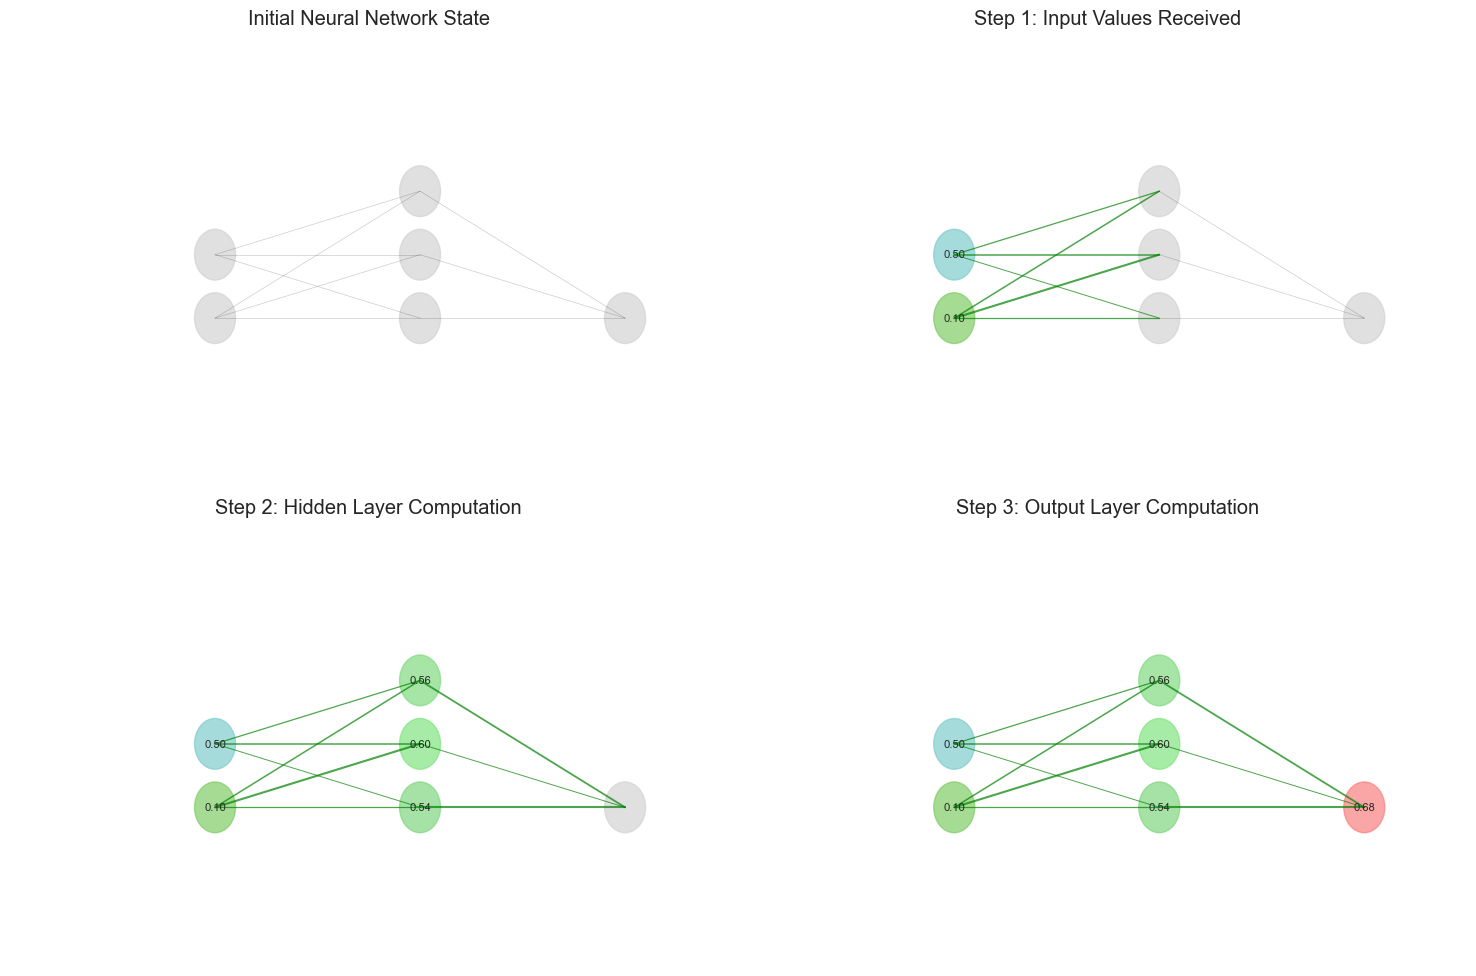

In [29]:
def visualize_forward_propagation():
    """Visualize the forward propagation process with static plots instead of animation"""
    # Create a simple dataset for visualization
    X = np.array([[0.5, 0.1]])  # Example input
    
    # Create a small neural network
    nn = NeuralNetwork([2, 3, 1])
    # Set some specific weights and biases for clearer visualization
    nn.weights = [
        np.array([[0.2, 0.3, 0.1], [0.3, 0.5, 0.2]]),  # First layer weights
        np.array([[0.4], [0.1], [0.5]])  # Second layer weights
    ]
    nn.biases = [
        np.array([0.1, 0.2, 0.1]),  # First layer biases
        np.array([0.2])  # Second layer biases
    ]
    
    # Perform forward pass
    output, cache = nn.forward(X, sigmoid, sigmoid)
    
    # Create a figure with multiple subplots for different stages
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()
    
    network_structure = [2, 3, 1]
    
    # Draw networks at different stages
    titles = [
        "Initial Neural Network State", 
        "Step 1: Input Values Received",
        "Step 2: Hidden Layer Computation", 
        "Step 3: Output Layer Computation"
    ]
    
    for i, (ax, title) in enumerate(zip(axs, titles)):
        # Draw the network at this stage - PASS nn HERE
        draw_network_static(ax, network_structure, X, cache, output, nn, stage=i)
        ax.set_title(title)
    
    plt.tight_layout()
    plt.show()

def draw_network_static(ax, network_structure, X, cache, output, nn, stage=0):
    """Draw a static network visualization at a particular stage"""
    # Similar to the draw_network function in the animation but without animation logic
    v_spacing = 0.25
    h_spacing = 1
    
    # Draw neurons for each layer
    neuron_positions = []
    for l, layer_size in enumerate(network_structure):
        layer_positions = []
        for i in range(layer_size):
            x = l * h_spacing + 0.5
            y = (layer_size - i - 0.5) * v_spacing + 0.5
            
            # Determine fill color based on stage
            if stage == 0:
                # Initial state - all neurons are inactive
                fill_color = 'lightgray'
            elif l == 0 and stage >= 1:
                # Input layer activation
                fill_color = 'skyblue'
                intensity = min(1.0, X[0, i] + 0.3)
                fill_color = (0.5, 0.8, intensity)
            elif l == 1 and stage >= 2:
                # Hidden layer activation
                intensity = min(1.0, cache['activations'][1][0, i] + 0.3)
                fill_color = (0.5, intensity, 0.5)
            elif l == 2 and stage >= 3:
                # Output layer activation
                intensity = min(1.0, output[0, i] + 0.3)
                fill_color = (intensity, 0.5, 0.5)
            else:
                fill_color = 'lightgray'
            
            circle = plt.Circle((x, y), 0.1, fill=True, color=fill_color, alpha=0.7)
            ax.add_patch(circle)
            layer_positions.append((x, y))
            
            # Add values inside neurons
            if stage > 0:
                if l == 0 and stage >= 1:
                    ax.text(x, y, f'{X[0, i]:.2f}', ha='center', va='center', fontsize=8)
                elif l == 1 and stage >= 2:
                    ax.text(x, y, f'{cache["activations"][1][0, i]:.2f}', ha='center', va='center', fontsize=8)
                elif l == 2 and stage >= 3:
                    ax.text(x, y, f'{output[0, i]:.2f}', ha='center', va='center', fontsize=8)
        
        neuron_positions.append(layer_positions)
    
    # Draw connections between neurons
    for l in range(len(network_structure) - 1):
        for i in range(network_structure[l]):
            for j in range(network_structure[l + 1]):
                x1, y1 = neuron_positions[l][i]
                x2, y2 = neuron_positions[l+1][j]
                
                # Determine line color and width based on stage and weight value
                if (l == 0 and stage >= 1) or (l == 1 and stage >= 2):
                    weight = nn.weights[l][i, j]  # Now nn is properly accessible
                    # Scale weight for visualization
                    line_width = 0.5 + abs(weight) * 2
                    alpha = 0.7
                    if weight > 0:
                        line_color = 'green'
                    else:
                        line_color = 'red'
                else:
                    line_width = 0.5
                    alpha = 0.2
                    line_color = 'black'
                
                line = ax.plot([x1, x2], [y1, y2], color=line_color, alpha=alpha, linewidth=line_width)[0]
    
    # Set limits and remove axes
    max_height = max(network_structure) * v_spacing + 1
    ax.set_xlim(-0.5, (len(network_structure) - 1) * h_spacing + 1)
    ax.set_ylim(0, max_height)
    ax.axis('off')

# Display the forward propagation visualization
visualize_forward_propagation()


### A Metaphor for Forward Propagation

Think of a neural network as a factory assembly line. Raw materials (input data) enter the factory and move through a series of specialized workstations (layers of neurons). At each workstation, workers (neurons) perform specific operations on the materials, transforming them based on their training (weights and biases). 

Each worker examines the materials, weighs their importance based on past experience, applies their own unique twist (activation function), and passes the result to the next workstation. Finally, at the end of the assembly line, the finished products (predictions) emerge, ready for use.

## 3. Backpropagation: How Neural Networks Learn

### Understanding the Learning Process

Neural networks learn by adjusting their weights and biases to minimize the difference between their predictions and the actual target values. This learning process involves:

1. **Forward Propagation**: Running inputs through the network to get predictions
2. **Calculating Error**: Measuring how far off these predictions are from the actual targets
3. **Backpropagation**: Computing how much each weight contributed to the error
4. **Weight Update**: Adjusting the weights to reduce future error

### Loss Functions

Loss functions measure the difference between the network's predictions and the actual target values. Different tasks require different loss functions:


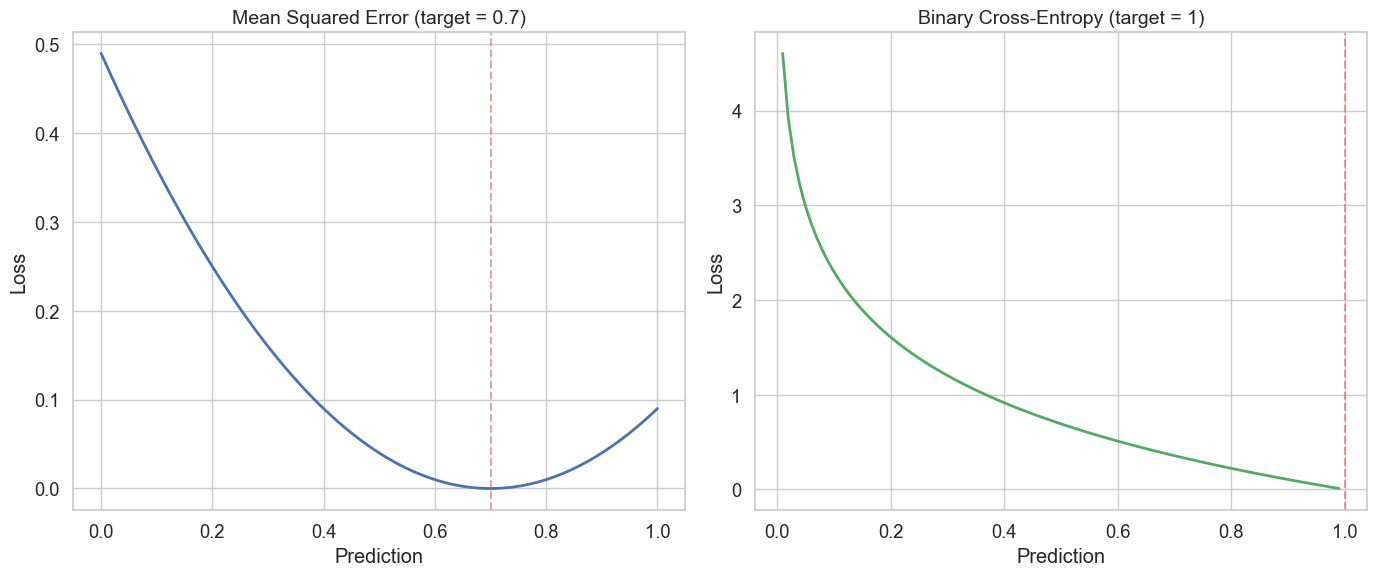

In [30]:

def mean_squared_error(y_true, y_pred):
    """
    Mean Squared Error loss function
    
    Parameters:
    -----------
    y_true : array-like
        True target values
    y_pred : array-like
        Predicted values
        
    Returns:
    --------
    float
        The mean squared error
    """
    return np.mean(np.square(y_true - y_pred))

def binary_cross_entropy(y_true, y_pred):
    """
    Binary Cross-Entropy loss function
    
    Parameters:
    -----------
    y_true : array-like
        True target values (0 or 1)
    y_pred : array-like
        Predicted probabilities
        
    Returns:
    --------
    float
        The binary cross-entropy loss
    """
    # Add small epsilon to avoid log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def categorical_cross_entropy(y_true, y_pred):
    """
    Categorical Cross-Entropy loss function
    
    Parameters:
    -----------
    y_true : array-like
        True target values (one-hot encoded)
    y_pred : array-like
        Predicted probabilities
        
    Returns:
    --------
    float
        The categorical cross-entropy loss
    """
    # Add small epsilon to avoid log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

def plot_loss_functions():
    """Visualize common loss functions"""
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # MSE
    y_true = 0.7
    y_pred = np.linspace(0, 1, 100)
    mse = np.square(y_true - y_pred)
    
    axs[0].plot(y_pred, mse, 'b-', linewidth=2)
    axs[0].set_title('Mean Squared Error (target = 0.7)', fontsize=14)
    axs[0].set_xlabel('Prediction')
    axs[0].set_ylabel('Loss')
    axs[0].axvline(x=y_true, color='r', linestyle='--', alpha=0.5)
    axs[0].grid(True)
    
    # Binary Cross-Entropy
    y_true = 1
    y_pred = np.linspace(0.01, 0.99, 100)
    bce = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    axs[1].plot(y_pred, bce, 'g-', linewidth=2)
    axs[1].set_title('Binary Cross-Entropy (target = 1)', fontsize=14)
    axs[1].set_xlabel('Prediction')
    axs[1].set_ylabel('Loss')
    axs[1].axvline(x=y_true, color='r', linestyle='--', alpha=0.5)
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

plot_loss_functions()



### Loss Function Characteristics and Use Cases

| Loss Function | Description | Common Use Cases |
|---------------|-------------|------------------|
| Mean Squared Error (MSE) | Measures the average squared difference between predictions and actual values | Regression problems |
| Binary Cross-Entropy | Measures the performance of a classification model whose output is a probability value between 0 and 1 | Binary classification |
| Categorical Cross-Entropy | Extension of binary cross-entropy for multi-class classification | Multi-class classification |

### Gradient Descent and Backpropagation

Gradient descent is an optimization algorithm used to minimize the loss function by iteratively moving in the direction of steepest descent (negative of the gradient).

Backpropagation is the algorithm used to efficiently compute the gradient of the loss function with respect to each weight in the network. It works by applying the chain rule of calculus from the output layer back to the input layer.

Let's implement the backpropagation algorithm:


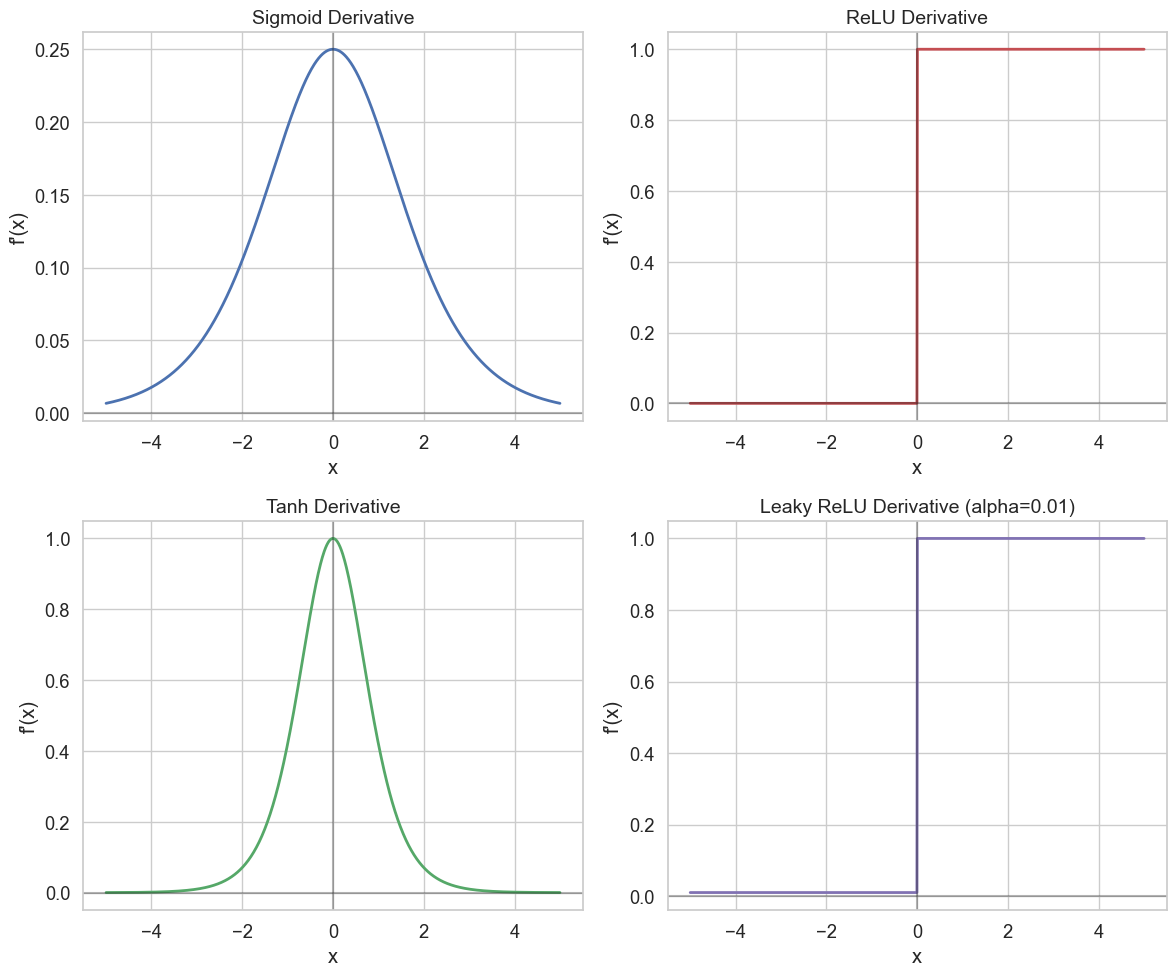

In [31]:

def sigmoid_derivative(x):
    """
    Derivative of the sigmoid function
    
    Parameter:
    ----------
    x : float or array
        Input to the sigmoid function
        
    Returns:
    --------
    float or array
        The derivative of sigmoid at x
    """
    s = sigmoid(x)
    return s * (1 - s)

def relu_derivative(x):
    """
    Derivative of the ReLU function
    
    Parameter:
    ----------
    x : float or array
        Input to the ReLU function
        
    Returns:
    --------
    float or array
        The derivative of ReLU at x
    """
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    """
    Derivative of the tanh function
    
    Parameter:
    ----------
    x : float or array
        Input to the tanh function
        
    Returns:
    --------
    float or array
        The derivative of tanh at x
    """
    return 1 - np.square(np.tanh(x))

def leaky_relu_derivative(x, alpha=0.01):
    """
    Derivative of the Leaky ReLU function
    
    Parameters:
    -----------
    x : float or array
        Input to the Leaky ReLU function
    alpha : float, default=0.01
        Slope for negative inputs
        
    Returns:
    --------
    float or array
        The derivative of Leaky ReLU at x
    """
    return np.where(x > 0, 1, alpha)

def plot_activation_derivatives():
    """Plot derivatives of common activation functions"""
    x = np.linspace(-5, 5, 1000)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # Sigmoid derivative
    axs[0, 0].plot(x, sigmoid_derivative(x), 'b-', linewidth=2)
    axs[0, 0].set_title('Sigmoid Derivative', fontsize=14)
    axs[0, 0].grid(True)
    axs[0, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axs[0, 0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # ReLU derivative
    axs[0, 1].plot(x, relu_derivative(x), 'r-', linewidth=2)
    axs[0, 1].set_title('ReLU Derivative', fontsize=14)
    axs[0, 1].grid(True)
    axs[0, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axs[0, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Tanh derivative
    axs[1, 0].plot(x, tanh_derivative(x), 'g-', linewidth=2)
    axs[1, 0].set_title('Tanh Derivative', fontsize=14)
    axs[1, 0].grid(True)
    axs[1, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axs[1, 0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Leaky ReLU derivative
    axs[1, 1].plot(x, leaky_relu_derivative(x), 'm-', linewidth=2)
    axs[1, 1].set_title('Leaky ReLU Derivative (alpha=0.01)', fontsize=14)
    axs[1, 1].grid(True)
    axs[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axs[1, 1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    for ax in axs.flat:
        ax.set(xlabel='x', ylabel="f'(x)")
    
    plt.tight_layout()
    plt.show()

plot_activation_derivatives()


Now let's extend our neural network class to include backpropagation and weight updates:


In [32]:

class NeuralNetwork:
    def __init__(self, layer_sizes):
        """
        Initialize a neural network with the given layer sizes
        
        Parameter:
        ----------
        layer_sizes : list
            Number of neurons in each layer (including input and output layers)
        """
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        
        # Initialize weights and biases
        self.weights = []
        self.biases = []
        
        # For each pair of adjacent layers
        for i in range(self.num_layers - 1):
            # Initialize weights with Xavier/Glorot initialization
            scale = np.sqrt(2 / (layer_sizes[i] + layer_sizes[i+1]))
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]) * scale)
            
            # Initialize biases to zero
            self.biases.append(np.zeros(layer_sizes[i+1]))
    
    def forward(self, X, activation_function, output_activation=None):
        """
        Perform forward propagation through the network
        
        Parameters:
        -----------
        X : array-like
            Input data, shape (n_samples, n_features)
        activation_function : function
            Activation function for hidden layers
        output_activation : function, default=None
            Activation function for output layer
            If None, uses the same activation as hidden layers
            
        Returns:
        --------
        tuple
            (output_activations, network_cache)
        """
        # Make sure X is a 2D array (samples × features)
        if X.ndim == 1:
            X = X.reshape(1, -1)
            
        # Store all activations and intermediate values for backpropagation
        activations = [X]  # List to store activations for each layer
        pre_activations = []  # List to store pre-activation values (z)
        
        # Forward propagate through each layer
        current_activation = X
        
        for i in range(self.num_layers - 1):
            # Compute weighted sum of inputs plus bias
            z = np.dot(current_activation, self.weights[i]) + self.biases[i]
            pre_activations.append(z)
            
            # Apply activation function
            # Use output_activation for the last layer if provided
            if i == self.num_layers - 2 and output_activation is not None:
                current_activation = output_activation(z)
            else:
                current_activation = activation_function(z)
                
            activations.append(current_activation)
        
        # Store the network state for backpropagation
        network_cache = {
            'activations': activations,
            'pre_activations': pre_activations
        }
        
        return activations[-1], network_cache
    
    def backpropagation(self, y_true, network_cache, activation_function, 
                      activation_derivative, output_activation=None, 
                      output_activation_derivative=None, loss_derivative=None):
        """
        Perform backpropagation to compute gradients
        
        Parameters:
        -----------
        y_true : array-like
            True target values
        network_cache : dict
            Cache of values from forward propagation
        activation_function : function
            Activation function for hidden layers
        activation_derivative : function
            Derivative of activation function for hidden layers
        output_activation : function, default=None
            Activation function for output layer
        output_activation_derivative : function, default=None
            Derivative of activation function for output layer
        loss_derivative : function, default=None
            Derivative of loss function w.r.t. output activation
            
        Returns:
        --------
        tuple
            (weight_gradients, bias_gradients)
        """
        activations = network_cache['activations']
        pre_activations = network_cache['pre_activations']
        
        # Get predictions
        y_pred = activations[-1]
        
        # Initialize gradient lists
        weight_gradients = [None] * (self.num_layers - 1)
        bias_gradients = [None] * (self.num_layers - 1)
        
        # Compute initial error at the output layer
        if loss_derivative is not None:
            # If a specific loss derivative is provided
            delta = loss_derivative(y_true, y_pred)
        else:
            # Default: MSE derivative
            delta = y_pred - y_true
        
        # Backpropagate the error
        for layer in reversed(range(self.num_layers - 1)):
            # For the output layer, we might use a different activation function
            if layer == self.num_layers - 2 and output_activation is not None:
                delta = delta * output_activation_derivative(pre_activations[layer])
            else:
                delta = delta * activation_derivative(pre_activations[layer])
            
            # Compute gradients for this layer
            weight_gradients[layer] = np.dot(activations[layer].T, delta) / delta.shape[0]
            bias_gradients[layer] = np.mean(delta, axis=0)
            
            # Compute delta for the previous layer (if not the input layer)
            if layer > 0:
                delta = np.dot(delta, self.weights[layer].T)
        
        return weight_gradients, bias_gradients
    
    def update_parameters(self, weight_gradients, bias_gradients, learning_rate):
        """
        Update network weights and biases using computed gradients
        
        Parameters:
        -----------
        weight_gradients : list
            Gradients for each layer's weights
        bias_gradients : list
            Gradients for each layer's biases
        learning_rate : float
            Learning rate for gradient descent
        """
        # Update each layer
        for layer in range(self.num_layers - 1):
            self.weights[layer] -= learning_rate * weight_gradients[layer]
            self.biases[layer] -= learning_rate * bias_gradients[layer]
    
    def train_step(self, X_batch, y_batch, learning_rate, activation_function, 
                  activation_derivative, output_activation=None, 
                  output_activation_derivative=None, loss_function=None, loss_derivative=None):
        """
        Perform a single training step (forward pass, backward pass, parameter update)
        
        Parameters:
        -----------
        X_batch : array-like
            Batch of input data
        y_batch : array-like
            Batch of target values
        learning_rate : float
            Learning rate for gradient descent
        activation_function : function
            Activation function for hidden layers
        activation_derivative : function
            Derivative of activation function for hidden layers
        output_activation : function, default=None
            Activation function for output layer
        output_activation_derivative : function, default=None
            Derivative of activation function for output layer
        loss_function : function, default=None
            Loss function to compute error
        loss_derivative : function, default=None
            Derivative of loss function w.r.t. output activation
            
        Returns:
        --------
        float
            The loss value for this batch
        """
        # Forward pass
        y_pred, cache = self.forward(X_batch, activation_function, output_activation)
        
        # Compute loss
        if loss_function is not None:
            loss = loss_function(y_batch, y_pred)
        else:
            # Default to MSE
            loss = mean_squared_error(y_batch, y_pred)
        
        # Backward pass
        weight_gradients, bias_gradients = self.backpropagation(
            y_batch, cache, activation_function, activation_derivative,
            output_activation, output_activation_derivative, loss_derivative
        )
        
        # Update parameters
        self.update_parameters(weight_gradients, bias_gradients, learning_rate)
        
        return loss
    
    def fit(self, X, y, epochs=100, batch_size=32, learning_rate=0.01, 
           activation_function=sigmoid, activation_derivative=sigmoid_derivative,
           output_activation=None, output_activation_derivative=None,
           loss_function=None, loss_derivative=None, validation_data=None,
           verbose=True, early_stopping_patience=None):
        """
        Train the neural network
        
        Parameters:
        -----------
        X : array-like
            Training input data
        y : array-like
            Training target values
        epochs : int, default=100
            Number of training epochs (complete passes through the dataset)
        batch_size : int, default=32
            Number of samples per gradient update
        learning_rate : float, default=0.01
            Learning rate for gradient descent
        activation_function : function, default=sigmoid
            Activation function for hidden layers
        activation_derivative : function, default=sigmoid_derivative
            Derivative of activation function for hidden layers
        output_activation : function, default=None
            Activation function for output layer
        output_activation_derivative : function, default=None
            Derivative of activation function for output layer
        loss_function : function, default=None
            Loss function to compute error
        loss_derivative : function, default=None
            Derivative of loss function w.r.t. output activation
        validation_data : tuple, default=None
            (X_val, y_val) for validation
        verbose : bool, default=True
            Whether to print training progress
        early_stopping_patience : int, default=None
            Number of epochs with no improvement after which training will be stopped
            
        Returns:
        --------
        dict
            Training history (loss, validation loss if validation_data is provided)
        """
        # Make sure X and y are numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # Initialize history
        history = {
            'loss': [],
            'val_loss': [] if validation_data is not None else None
        }
        
        # Early stopping variables
        if early_stopping_patience is not None:
            best_val_loss = float('inf')
            patience_counter = 0
        
        # Training loop
        for epoch in range(epochs):
            # Shuffle the data
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            # Process mini-batches
            losses = []
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                
                batch_loss = self.train_step(
                    X_batch, y_batch, learning_rate, 
                    activation_function, activation_derivative,
                    output_activation, output_activation_derivative,
                    loss_function, loss_derivative
                )
                losses.append(batch_loss)
            
            # Compute average loss for the epoch
            avg_loss = np.mean(losses)
            history['loss'].append(avg_loss)
            
            # Compute validation loss if validation data is provided
            if validation_data is not None:
                X_val, y_val = validation_data
                y_val_pred, _ = self.forward(X_val, activation_function, output_activation)
                
                if loss_function is not None:
                    val_loss = loss_function(y_val, y_val_pred)
                else:
                    val_loss = mean_squared_error(y_val, y_val_pred)
                
                history['val_loss'].append(val_loss)
                
                # Check for early stopping
                if early_stopping_patience is not None:
                    if val_loss < best_val_loss:
                        best_val_loss = val_loss
                        patience_counter = 0
                    else:
                        patience_counter += 1
                        
                    if patience_counter >= early_stopping_patience:
                        if verbose:
                            print(f"Early stopping at epoch {epoch+1}")
                        break
            
            # Print progress
            if verbose and (epoch % 10 == 0 or epoch == epochs - 1):
                if validation_data is not None:
                    print(f"Epoch {epoch+1}/{epochs} - loss: {avg_loss:.4f} - val_loss: {val_loss:.4f}")
                else:
                    print(f"Epoch {epoch+1}/{epochs} - loss: {avg_loss:.4f}")
        
        return history
    
    def predict(self, X, activation_function, output_activation=None):
        """
        Make predictions for input data
        
        Parameters:
        -----------
        X : array-like
            Input data
        activation_function : function
            Activation function for hidden layers
        output_activation : function, default=None
            Activation function for output layer
            
        Returns:
        --------
        array
            Predicted values
        """
        predictions, _ = self.forward(X, activation_function, output_activation)
        return predictions



### Visualizing Backpropagation

Let's visualize the backpropagation process with a simple example:


In [33]:
# def visualize_backpropagation():
#     """Visualize the backpropagation process step by step"""
#     # Create a simple dataset for visualization
#     X = np.array([[0.5, 0.1]])  # Example input
#     y = np.array([[0.7]])  # Target output - make sure it's 2D
    
#     # Create a small neural network
#     nn = NeuralNetwork([2, 3, 1])
#     # Set some specific weights and biases for clearer visualization
#     nn.weights = [
#         np.array([[0.2, 0.3, 0.1], [0.3, 0.5, 0.2]]),  # First layer weights
#         np.array([[0.4], [0.1], [0.5]])  # Second layer weights
#     ]
#     nn.biases = [
#         np.array([0.1, 0.2, 0.1]),  # First layer biases
#         np.array([0.2])  # Second layer biases
#     ]
    
#     # Perform forward pass
#     y_pred, cache = nn.forward(X, sigmoid, sigmoid)
    
#     # Compute loss - this is a scalar
#     loss = mean_squared_error(y, y_pred)
    
#     # Ensure y_pred and y have the right shape and extract scalar values for display
#     # This prevents indexing errors
#     if hasattr(y_pred, 'shape') and len(y_pred.shape) == 2 and y_pred.shape[0] > 0 and y_pred.shape[1] > 0:
#         pred_val = y_pred[0, 0]
#     else:
#         pred_val = float(y_pred)  # Convert to float if it's a scalar or different shape
        
#     if hasattr(y, 'shape') and len(y.shape) == 2 and y.shape[0] > 0 and y.shape[1] > 0:
#         true_val = y[0, 0]
#     else:
#         true_val = float(y)  # Convert to float if it's a scalar or different shape
    
#     # Calculate the output error once for use in the animation
#     output_error = pred_val - true_val
    
#     # Perform backward pass
#     weight_gradients, bias_gradients = nn.backpropagation(
#         y, cache, sigmoid, sigmoid_derivative,
#         sigmoid, sigmoid_derivative
#     )
    
#     # Set up the figure for animation
#     fig, ax = plt.subplots(figsize=(10, 6))
#     plt.close()  # Don't display the figure yet
    
#     network_structure = [2, 3, 1]
#     v_spacing = 0.25
#     h_spacing = 1
    
#     def draw_network(frame):
#         ax.clear()
        
#         # Draw neurons for each layer
#         neuron_positions = []
#         for l, layer_size in enumerate(network_structure):
#             layer_positions = []
#             for i in range(layer_size):
#                 x = l * h_spacing + 0.5
#                 y = (layer_size - i - 0.5) * v_spacing + 0.5
                
#                 # Determine fill color based on animation frame
#                 if frame <= 3:  # Forward pass frames
#                     if frame == 0:
#                         # Initial state - all neurons are inactive
#                         fill_color = 'lightgray'
#                     elif l == 0 and frame >= 1:
#                         # Input layer activation
#                         fill_color = 'skyblue'
#                         intensity = min(1.0, X[0, i] + 0.3)  # Scale for visibility
#                         fill_color = (0.5, 0.8, intensity)
#                     elif l == 1 and frame >= 2:
#                         # Hidden layer activation
#                         intensity = min(1.0, cache['activations'][1][0, i] + 0.3)
#                         fill_color = (0.5, intensity, 0.5)
#                     elif l == 2 and frame >= 3:
#                         # Output layer activation
#                         if i < y_pred.shape[1]:  # Check if index is valid
#                             intensity = min(1.0, pred_val + 0.3)
#                             fill_color = (intensity, 0.5, 0.5)
#                         else:
#                             fill_color = 'lightgray'
#                     else:
#                         fill_color = 'lightgray'
#                 else:  # Backward pass frames
#                     if l == 2:  # Output layer
#                         # Output error visualization
#                         fill_color = 'red'
#                         intensity = min(1.0, abs(output_error) + 0.5)
#                         fill_color = (intensity, 0.5, 0.5)
#                     elif l == 1 and frame >= 5:  # Hidden layer during backprop
#                         # Hidden layer error visualization
#                         # Arbitrary intensity for visualization
#                         fill_color = (0.8, 0.6, 0.3)
#                     elif l == 0:  # Input layer doesn't get error signals
#                         fill_color = 'skyblue'
#                     else:
#                         fill_color = 'lightgray'
                
#                 circle = plt.Circle((x, y), 0.1, fill=True, color=fill_color, alpha=0.7)
#                 ax.add_patch(circle)
#                 layer_positions.append((x, y))
                
#                 # Add values inside neurons
#                 if l == 0 and frame >= 1:
#                     ax.text(x, y, f'{X[0, i]:.2f}', ha='center', va='center', fontsize=8)
#                 elif l == 1 and frame >= 2:
#                     ax.text(x, y, f'{cache["activations"][1][0, i]:.2f}', ha='center', va='center', fontsize=8)
#                 elif l == 2 and frame >= 3:
#                     # For output layer, show prediction and target
#                     if frame < 4:
#                         ax.text(x, y, f'{pred_val:.2f}', ha='center', va='center', fontsize=8)
#                     else:
#                         ax.text(x, y, f'{pred_val:.2f}\nTarget:{true_val:.2f}', 
#                                 ha='center', va='center', fontsize=7)
            
#             neuron_positions.append(layer_positions)
        
#         # Draw connections between neurons
#         for l in range(len(network_structure) - 1):
#             for i in range(network_structure[l]):
#                 for j in range(network_structure[l + 1]):
#                     x1, y1 = neuron_positions[l][i]
#                     x2, y2 = neuron_positions[l+1][j]
                    
#                     # Determine line color, width and direction based on frame
#                     if frame <= 3:  # Forward pass
#                         if (l == 0 and frame >= 1) or (l == 1 and frame >= 2):
#                             weight = nn.weights[l][i, j]
#                             # Scale weight for visualization
#                             line_width = 0.5 + abs(weight) * 2
#                             alpha = 0.7
#                             if weight > 0:
#                                 line_color = 'green'
#                             else:
#                                 line_color = 'red'
#                             # Forward direction
#                             arrow = ax.arrow(x1, y1, (x2-x1)*0.8, (y2-y1)*0.8, 
#                                            width=0.005, head_width=0.02, head_length=0.03,
#                                            fc=line_color, ec=line_color, alpha=alpha,
#                                            length_includes_head=True)
#                         else:
#                             line_width = 0.5
#                             alpha = 0.2
#                             line_color = 'black'
#                             line = ax.plot([x1, x2], [y1, y2], color=line_color, 
#                                          alpha=alpha, linewidth=line_width)[0]
#                     else:  # Backward pass
#                         if (l == 1 and frame >= 4) or (l == 0 and frame >= 5):
#                             # Gradient visualization - higher gradient = thicker line
#                             gradient = weight_gradients[l][i, j]
#                             # Scale gradient for visualization
#                             line_width = 0.5 + abs(gradient) * 10  # Amplify for visibility
#                             alpha = 0.7
#                             if gradient > 0:
#                                 line_color = 'purple'
#                             else:
#                                 line_color = 'orange'
#                             # Backward direction
#                             arrow = ax.arrow(x2, y2, (x1-x2)*0.8, (y1-y2)*0.8, 
#                                            width=0.005, head_width=0.02, head_length=0.03,
#                                            fc=line_color, ec=line_color, alpha=alpha,
#                                            length_includes_head=True)
#                         else:
#                             line_width = 0.5
#                             alpha = 0.2
#                             line_color = 'black'
#                             line = ax.plot([x1, x2], [y1, y2], color=line_color, 
#                                          alpha=alpha, linewidth=line_width)[0]
        
#         # Set limits and remove axes
#         max_height = max(network_structure) * v_spacing + 1
#         ax.set_xlim(-0.5, (len(network_structure) - 1) * h_spacing + 1)
#         ax.set_ylim(0, max_height)
#         ax.axis('off')
        
#         # Add titles and explanations based on frame
#         if frame == 0:
#             ax.set_title('Initial Neural Network State', fontsize=14)
#         elif frame == 1:
#             ax.set_title('Forward Pass: Input Layer', fontsize=14)
#         elif frame == 2:
#             ax.set_title('Forward Pass: Hidden Layer Computation', fontsize=14)
#         elif frame == 3:
#             ax.set_title('Forward Pass: Output Layer Prediction', fontsize=14)
#             # Add loss calculation using the scalar values
#             loss_text = f"Loss: MSE = (pred - target)² = ({pred_val:.4f} - {true_val:.4f})² = {loss:.4f}"
#             ax.text(1.0, max_height - 0.1, loss_text, ha='center', va='top', fontsize=10,
#                    bbox=dict(facecolor='lightyellow', alpha=0.9, boxstyle='round,pad=0.5'))
#         elif frame == 4:
#             ax.set_title('Backward Pass: Output Layer Error', fontsize=14)
#             # Add gradient calculation using the scalar output_error
#             grad_text = f"Output Gradient: 2(pred - target) = 2({pred_val:.4f} - {true_val:.4f}) = {2*output_error:.4f}"
#             ax.text(1.0, max_height - 0.1, grad_text, ha='center', va='top', fontsize=10,
#                    bbox=dict(facecolor='lightyellow', alpha=0.9, boxstyle='round,pad=0.5'))
#         elif frame == 5:
#             ax.set_title('Backward Pass: Hidden Layer Gradient Computation', fontsize=14)
#         elif frame == 6:
#             ax.set_title('Backward Pass: Weight Gradient Computation', fontsize=14)
#             # Add weight update explanation
#             update_text = "Weight Update: weight = weight - learning_rate * gradient"
#             ax.text(1.0, max_height - 0.1, update_text, ha='center', va='top', fontsize=10,
#                    bbox=dict(facecolor='lightyellow', alpha=0.9, boxstyle='round,pad=0.5'))
    
#     # Create animation
#     frames = 7  # 0: Initial, 1-3: Forward, 4-6: Backward
#     anim = FuncAnimation(fig, draw_network, frames=frames, interval=1500, blit=False)
    
#     # Display the animation
#     return HTML(anim.to_html5_video())

# Display the backpropagation animation (for mac requires brew install ffmpeg)
# visualize_backpropagation()

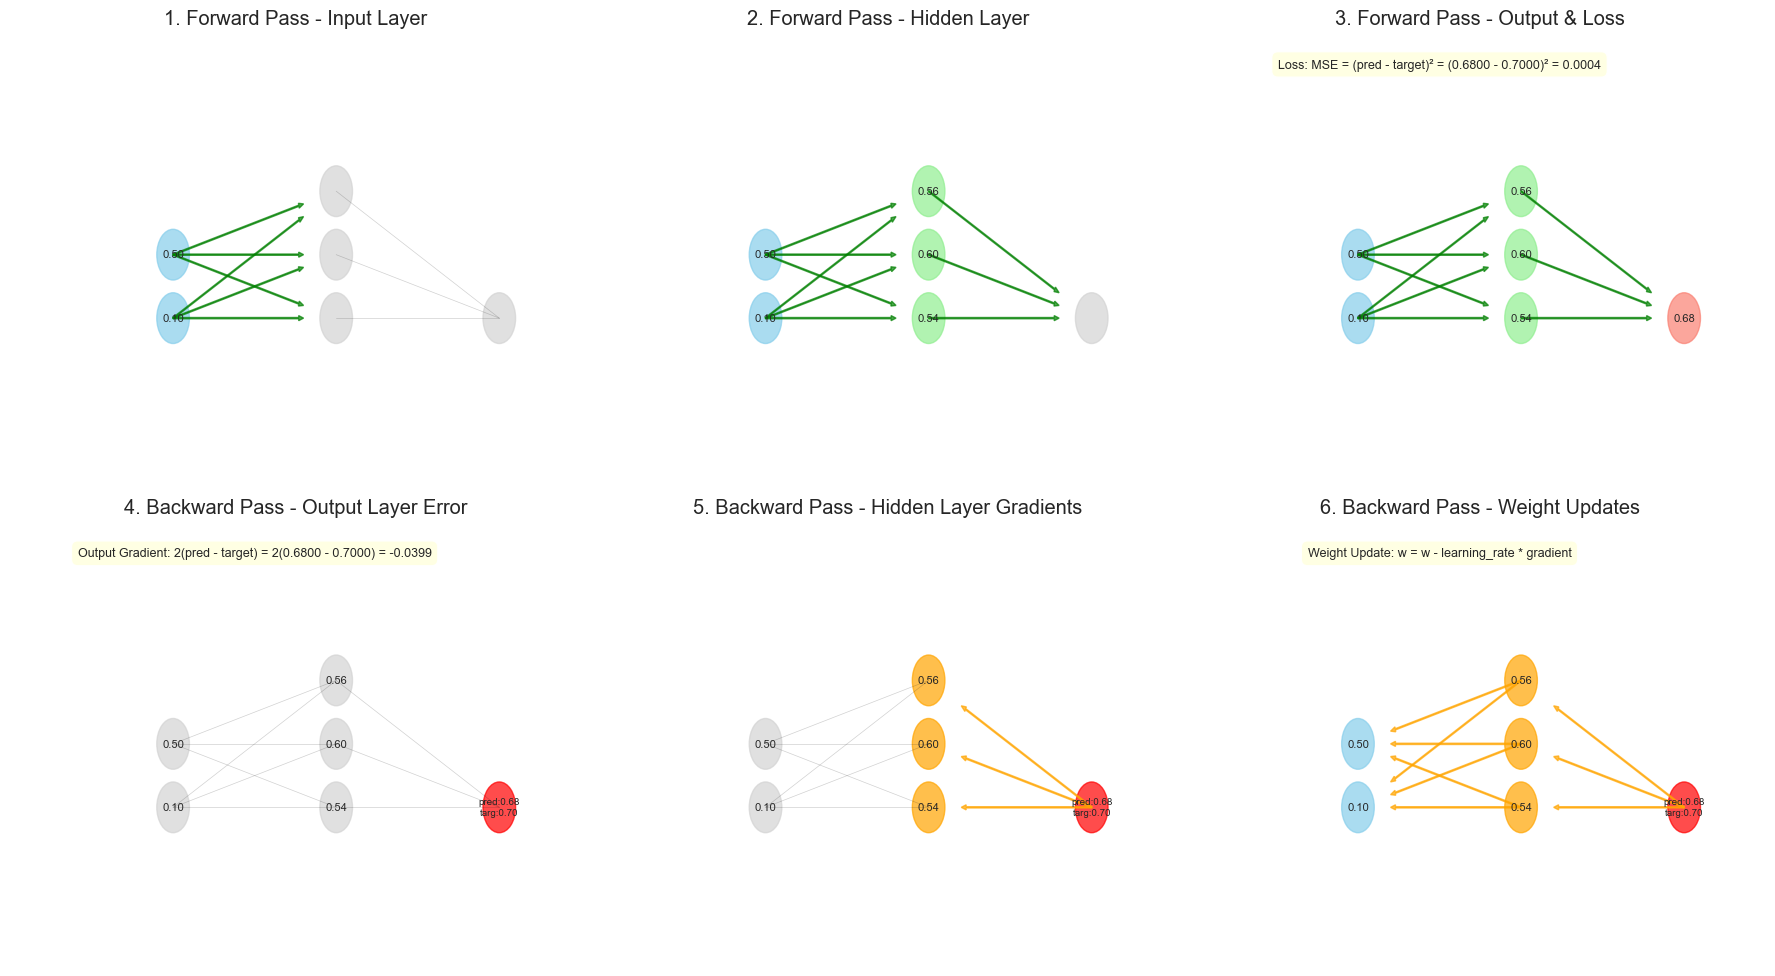

In [34]:
def visualize_backpropagation_static():
    """Visualize the backpropagation process with static plots instead of animation"""
    # Create a simple dataset for visualization
    X = np.array([[0.5, 0.1]])  # Example input
    y = np.array([[0.7]])  # Target output
    
    # Create a small neural network
    nn = NeuralNetwork([2, 3, 1])
    # Set some specific weights and biases for clearer visualization
    nn.weights = [
        np.array([[0.2, 0.3, 0.1], [0.3, 0.5, 0.2]]),  # First layer weights
        np.array([[0.4], [0.1], [0.5]])  # Second layer weights
    ]
    nn.biases = [
        np.array([0.1, 0.2, 0.1]),  # First layer biases
        np.array([0.2])  # Second layer biases
    ]
    
    # Perform forward pass
    y_pred, cache = nn.forward(X, sigmoid, sigmoid)
    
    # Compute loss
    loss = mean_squared_error(y, y_pred)
    
    # Perform backward pass
    weight_gradients, bias_gradients = nn.backpropagation(
        y, cache, sigmoid, sigmoid_derivative,
        sigmoid, sigmoid_derivative
    )
    
    # Create a figure with subplots for different stages of backpropagation
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.flatten()
    
    network_structure = [2, 3, 1]
    
    # Define titles for each subplot
    titles = [
        "1. Forward Pass - Input Layer",
        "2. Forward Pass - Hidden Layer",
        "3. Forward Pass - Output & Loss",
        "4. Backward Pass - Output Layer Error",
        "5. Backward Pass - Hidden Layer Gradients",
        "6. Backward Pass - Weight Updates" 
    ]
    
    # Draw networks at different stages
    for i, (ax, title) in enumerate(zip(axs, titles)):
        draw_backprop_static(ax, network_structure, X, y, y_pred, cache, weight_gradients, 
                             loss, nn, stage=i)
        ax.set_title(title)
    
    plt.tight_layout()
    plt.show()

def draw_backprop_static(ax, network_structure, X, y_true, y_pred, cache, weight_gradients, 
                          loss, nn, stage=0):
    """Draw a static visualization of backpropagation at a specific stage"""
    v_spacing = 0.25
    h_spacing = 1
    
    # Draw neurons for each layer
    neuron_positions = []
    for l, layer_size in enumerate(network_structure):
        layer_positions = []
        for i in range(layer_size):
            x = l * h_spacing + 0.5
            y = (layer_size - i - 0.5) * v_spacing + 0.5
            
            # Determine fill color based on stage
            if stage <= 2:  # Forward pass frames
                if stage == 0:
                    # Initial input layer highlight
                    fill_color = 'skyblue' if l == 0 else 'lightgray'
                elif stage == 1:
                    # Hidden layer highlight
                    fill_color = 'skyblue' if l == 0 else 'lightgreen' if l == 1 else 'lightgray'
                elif stage == 2:
                    # All layers active
                    if l == 0:
                        fill_color = 'skyblue'
                    elif l == 1:
                        fill_color = 'lightgreen'
                    elif l == 2:
                        fill_color = 'salmon'
            else:  # Backward pass frames
                if l == 2:  # Output layer
                    # Output error visualization
                    fill_color = 'red' if stage >= 3 else 'lightgray'
                elif l == 1 and stage >= 4:  # Hidden layer during backprop
                    # Hidden layer error visualization
                    fill_color = 'orange'
                elif l == 0 and stage >= 5:  # Input layer
                    fill_color = 'skyblue'
                else:
                    fill_color = 'lightgray'
            
            circle = plt.Circle((x, y), 0.1, fill=True, color=fill_color, alpha=0.7)
            ax.add_patch(circle)
            layer_positions.append((x, y))
            
            # Add values inside neurons
            if l == 0 and stage >= 0:
                ax.text(x, y, f'{X[0, i]:.2f}', ha='center', va='center', fontsize=8)
            elif l == 1 and stage >= 1:
                ax.text(x, y, f'{cache["activations"][1][0, i]:.2f}', ha='center', va='center', fontsize=8)
            elif l == 2 and stage >= 2:
                # For output layer, show prediction and target in stage 3+
                if stage < 3:
                    ax.text(x, y, f'{y_pred[0, i]:.2f}', ha='center', va='center', fontsize=8)
                else:
                    ax.text(x, y, f'pred:{y_pred[0, i]:.2f}\ntarg:{y_true[0, i]:.2f}', 
                            ha='center', va='center', fontsize=7)
        
        neuron_positions.append(layer_positions)
    
    # Draw connections between neurons
    for l in range(len(network_structure) - 1):
        for i in range(network_structure[l]):
            for j in range(network_structure[l + 1]):
                x1, y1 = neuron_positions[l][i]
                x2, y2 = neuron_positions[l+1][j]
                
                # Determine line properties based on stage
                if stage <= 2:  # Forward pass
                    if (l == 0 and stage >= 0) or (l == 1 and stage >= 1):
                        weight = nn.weights[l][i, j]
                        # Scale weight for visualization
                        line_width = 0.5 + abs(weight) * 2
                        alpha = 0.7
                        if weight > 0:
                            line_color = 'green'
                        else:
                            line_color = 'red'
                            
                        # Forward direction arrow
                        ax.arrow(x1, y1, (x2-x1)*0.8, (y2-y1)*0.8, 
                                width=0.005, head_width=0.02, head_length=0.03,
                                fc=line_color, ec=line_color, alpha=alpha,
                                length_includes_head=True)
                    else:
                        # Default connection
                        ax.plot([x1, x2], [y1, y2], 'k-', alpha=0.2, linewidth=0.5)
                else:  # Backward pass
                    if (l == 1 and stage >= 4) or (l == 0 and stage >= 5):
                        # Gradient visualization - higher gradient = thicker line
                        gradient = weight_gradients[l][i, j]
                        # Scale gradient for visualization
                        line_width = 0.5 + abs(gradient) * 10  # Amplify for visibility
                        alpha = 0.7
                        if gradient > 0:
                            line_color = 'purple'
                        else:
                            line_color = 'orange'
                            
                        # Backward direction arrow
                        ax.arrow(x2, y2, (x1-x2)*0.8, (y1-y2)*0.8, 
                                width=0.005, head_width=0.02, head_length=0.03,
                                fc=line_color, ec=line_color, alpha=alpha,
                                length_includes_head=True)
                    else:
                        # Forward connections remain visible but faded
                        ax.plot([x1, x2], [y1, y2], 'k-', alpha=0.2, linewidth=0.5)
    
    # Set limits and remove axes
    max_height = max(network_structure) * v_spacing + 1
    ax.set_xlim(-0.5, (len(network_structure) - 1) * h_spacing + 1)
    ax.set_ylim(0, max_height)
    ax.axis('off')
    
    # Add explanatory text for each stage
    if stage == 2:
        # Add loss calculation
        loss_text = f"Loss: MSE = (pred - target)² = ({y_pred[0, 0]:.4f} - {y_true[0, 0]:.4f})² = {loss:.4f}"
        ax.text(1, max_height - 0.1, loss_text, ha='center', va='top', fontsize=9,
               bbox=dict(facecolor='lightyellow', alpha=0.9, boxstyle='round,pad=0.5'))
    elif stage == 3:
        # Add gradient calculation
        grad_text = f"Output Gradient: 2(pred - target) = 2({y_pred[0, 0]:.4f} - {y_true[0, 0]:.4f}) = {2*(y_pred[0, 0] - y_true[0, 0]):.4f}"
        ax.text(1, max_height - 0.1, grad_text, ha='center', va='top', fontsize=9,
               bbox=dict(facecolor='lightyellow', alpha=0.9, boxstyle='round,pad=0.5'))
    elif stage == 5:
        # Add weight update explanation
        update_text = "Weight Update: w = w - learning_rate * gradient"
        ax.text(1, max_height - 0.1, update_text, ha='center', va='top', fontsize=9,
               bbox=dict(facecolor='lightyellow', alpha=0.9, boxstyle='round,pad=0.5'))

# Display the backpropagation animation
visualize_backpropagation_static()


### A Metaphor for Backpropagation

Imagine a chef (the neural network) trying to perfect a recipe (make accurate predictions). After each cooking attempt, the chef tastes the dish (forward pass) and compares it to the ideal flavor (loss function). The chef then analyzes which ingredients and cooking steps (weights and biases) contributed to the taste being off.

The chef works backward through the recipe, adjusting the amount of each ingredient and the cooking techniques (backpropagation). Ingredients added earlier in the recipe are harder to adjust precisely because their effects are complicated by subsequent cooking steps (vanishing gradient problem). Over many iterations, the chef gradually refines the recipe, getting closer to the perfect dish (model convergence).

## 4. Building a Neural Network from Scratch

Now that we understand the individual components, let's put everything together to build a neural network from scratch and apply it to a simple problem:


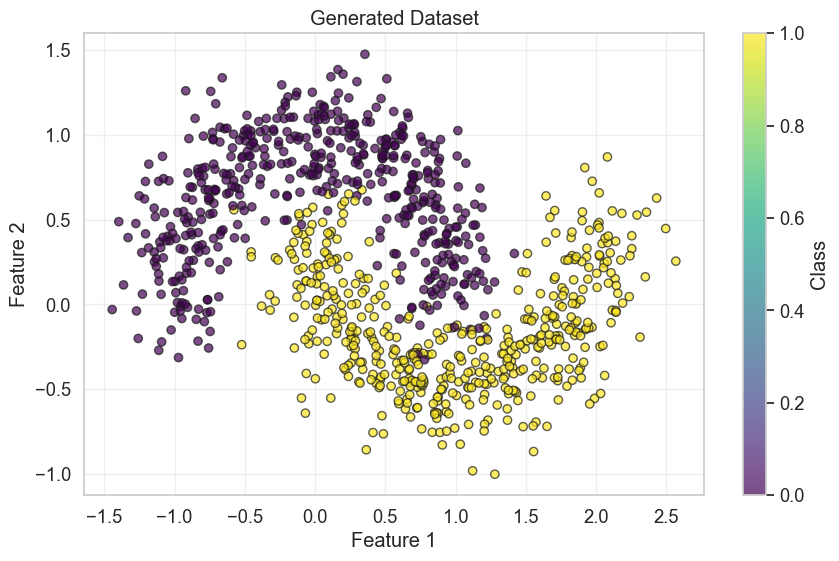

Epoch 1/500 - loss: 0.6378 - val_loss: 0.6347
Epoch 11/500 - loss: 0.5105 - val_loss: 0.5205
Epoch 21/500 - loss: 0.4485 - val_loss: 0.4623
Epoch 31/500 - loss: 0.4126 - val_loss: 0.4271
Epoch 41/500 - loss: 0.3892 - val_loss: 0.4033
Epoch 51/500 - loss: 0.3727 - val_loss: 0.3860
Epoch 61/500 - loss: 0.3604 - val_loss: 0.3728
Epoch 71/500 - loss: 0.3510 - val_loss: 0.3625
Epoch 81/500 - loss: 0.3436 - val_loss: 0.3542
Epoch 91/500 - loss: 0.3376 - val_loss: 0.3474
Epoch 101/500 - loss: 0.3327 - val_loss: 0.3418
Epoch 111/500 - loss: 0.3286 - val_loss: 0.3371
Epoch 121/500 - loss: 0.3251 - val_loss: 0.3331
Epoch 131/500 - loss: 0.3223 - val_loss: 0.3297
Epoch 141/500 - loss: 0.3198 - val_loss: 0.3267
Epoch 151/500 - loss: 0.3176 - val_loss: 0.3241
Epoch 161/500 - loss: 0.3158 - val_loss: 0.3219
Epoch 171/500 - loss: 0.3141 - val_loss: 0.3199
Epoch 181/500 - loss: 0.3127 - val_loss: 0.3182
Epoch 191/500 - loss: 0.3114 - val_loss: 0.3166
Epoch 201/500 - loss: 0.3103 - val_loss: 0.3152
Epo

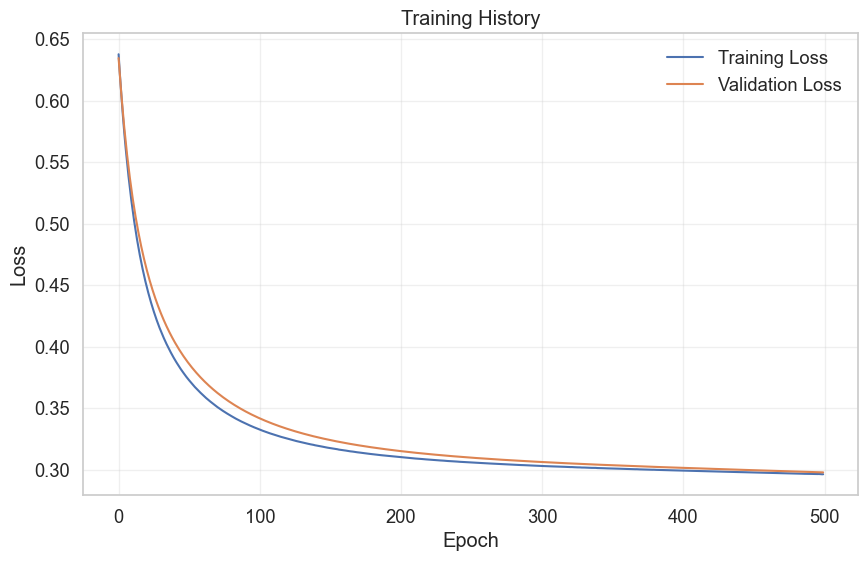

Accuracy: 0.8650
Precision: 0.8687
Recall: 0.8600
F1 Score: 0.8643


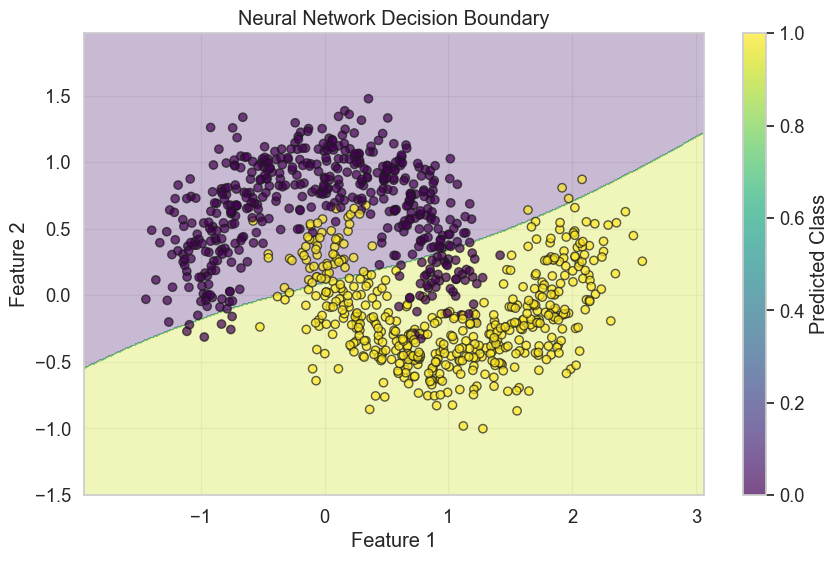

In [35]:

def generate_data(dataset_type='moons', n_samples=1000):
    """
    Generate a synthetic dataset for classification
    
    Parameters:
    -----------
    dataset_type : str, default='moons'
        Type of dataset to generate ('moons', 'circles', or 'linear')
    n_samples : int, default=1000
        Number of samples to generate
        
    Returns:
    --------
    tuple
        (X, y) - features and binary labels
    """
    if dataset_type == 'moons':
        X, y = make_moons(n_samples=n_samples, noise=0.2, random_state=42)
    elif dataset_type == 'circles':
        X, y = make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=42)
    elif dataset_type == 'linear':
        X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, 
                                  n_informative=2, random_state=42, n_clusters_per_class=1)
    else:
        raise ValueError("dataset_type must be 'moons', 'circles', or 'linear'")
        
    return X, y

def visualize_data(X, y):
    """
    Visualize the generated dataset
    
    Parameters:
    -----------
    X : array-like
        Features
    y : array-like
        Labels
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Generated Dataset')
    plt.colorbar(label='Class')
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_decision_boundary(X, y, model, activation_function, output_activation=None, title='Decision Boundary'):
    """
    Plot the decision boundary of a trained neural network
    
    Parameters:
    -----------
    X : array-like
        Features
    y : array-like
        Labels
    model : NeuralNetwork
        Trained neural network model
    activation_function : function
        Activation function for hidden layers
    output_activation : function, default=None
        Activation function for output layer
    title : str, default='Decision Boundary'
        Plot title
    """
    # Define the grid range
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Make predictions on the meshgrid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points, activation_function, output_activation)
    
    # Convert to binary class if probability output
    if Z.shape[1] == 1:
        Z = (Z > 0.5).astype(int)
    else:
        Z = np.argmax(Z, axis=1)
    
    # Reshape the predictions back to the meshgrid shape
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and data points
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Predicted Class')
    plt.show()

def plot_training_history(history):
    """
    Plot the training and validation loss over epochs
    
    Parameter:
    ----------
    history : dict
        Training history from model.fit()
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    
    if history['val_loss'] is not None:
        plt.plot(history['val_loss'], label='Validation Loss')
        
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training History')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def train_and_evaluate_nn():
    """Train and evaluate a neural network on a synthetic dataset"""
    # Generate data
    X, y = generate_data('moons', n_samples=1000)
    visualize_data(X, y)
    
    # Reshape y to match output layer shape
    y = y.reshape(-1, 1)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the neural network
    nn = NeuralNetwork([2, 16, 8, 1])  # 2 inputs, 16 and 8 hidden neurons, 1 output
    
    # Train with tanh for hidden layers and sigmoid for output
    history = nn.fit(
        X_train, y_train,
        epochs=500,
        batch_size=32,
        learning_rate=0.01,
        activation_function=tanh,
        activation_derivative=tanh_derivative,
        output_activation=sigmoid,
        output_activation_derivative=sigmoid_derivative,
        loss_function=binary_cross_entropy,
        validation_data=(X_test, y_test),
        verbose=True,
        early_stopping_patience=50
    )
    
    # Plot training history
    plot_training_history(history)
    
    # Make predictions
    y_pred = nn.predict(X_test, tanh, sigmoid)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot decision boundary
    plot_decision_boundary(X, y.reshape(-1), nn, tanh, sigmoid, 'Neural Network Decision Boundary')
    
    return nn

# Train and evaluate the neural network
nn_model = train_and_evaluate_nn()


## 5. Hyperparameters and Their Impact

Hyperparameters are the configuration settings that control the behavior of neural networks. Let's explore some key hyperparameters and investigate their impact on model performance:



Training model: Baseline
Epoch 1/300 - loss: 0.7278 - val_loss: 0.7265
Epoch 11/300 - loss: 0.6167 - val_loss: 0.6247
Epoch 21/300 - loss: 0.5446 - val_loss: 0.5579
Epoch 31/300 - loss: 0.4965 - val_loss: 0.5126
Epoch 41/300 - loss: 0.4628 - val_loss: 0.4804
Epoch 51/300 - loss: 0.4381 - val_loss: 0.4563
Epoch 61/300 - loss: 0.4194 - val_loss: 0.4377
Epoch 71/300 - loss: 0.4047 - val_loss: 0.4227
Epoch 81/300 - loss: 0.3927 - val_loss: 0.4104
Epoch 91/300 - loss: 0.3829 - val_loss: 0.4001
Epoch 101/300 - loss: 0.3746 - val_loss: 0.3912
Epoch 111/300 - loss: 0.3675 - val_loss: 0.3836
Epoch 121/300 - loss: 0.3614 - val_loss: 0.3769
Epoch 131/300 - loss: 0.3560 - val_loss: 0.3709
Epoch 141/300 - loss: 0.3513 - val_loss: 0.3656
Epoch 151/300 - loss: 0.3471 - val_loss: 0.3609
Epoch 161/300 - loss: 0.3434 - val_loss: 0.3566
Epoch 171/300 - loss: 0.3400 - val_loss: 0.3527
Epoch 181/300 - loss: 0.3370 - val_loss: 0.3492
Epoch 191/300 - loss: 0.3342 - val_loss: 0.3460
Epoch 201/300 - loss: 0.3

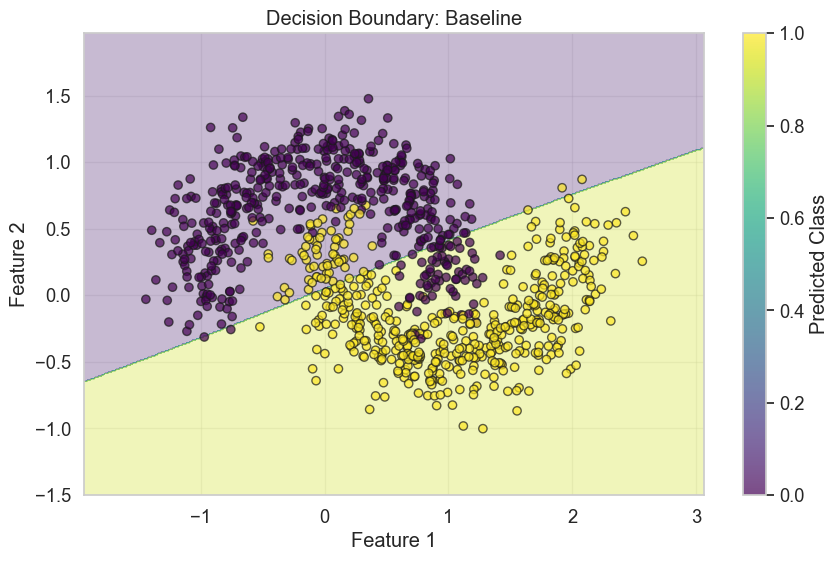


Training model: Deep Network
Epoch 1/300 - loss: 0.9033 - val_loss: 0.8660
Epoch 11/300 - loss: 0.6637 - val_loss: 0.6632
Epoch 21/300 - loss: 0.5474 - val_loss: 0.5640
Epoch 31/300 - loss: 0.4861 - val_loss: 0.5075
Epoch 41/300 - loss: 0.4471 - val_loss: 0.4686
Epoch 51/300 - loss: 0.4191 - val_loss: 0.4391
Epoch 61/300 - loss: 0.3977 - val_loss: 0.4158
Epoch 71/300 - loss: 0.3808 - val_loss: 0.3971
Epoch 81/300 - loss: 0.3675 - val_loss: 0.3821
Epoch 91/300 - loss: 0.3568 - val_loss: 0.3699
Epoch 101/300 - loss: 0.3483 - val_loss: 0.3601
Epoch 111/300 - loss: 0.3415 - val_loss: 0.3522
Epoch 121/300 - loss: 0.3358 - val_loss: 0.3456
Epoch 131/300 - loss: 0.3313 - val_loss: 0.3402
Epoch 141/300 - loss: 0.3275 - val_loss: 0.3357
Epoch 151/300 - loss: 0.3243 - val_loss: 0.3319
Epoch 161/300 - loss: 0.3214 - val_loss: 0.3286
Epoch 171/300 - loss: 0.3191 - val_loss: 0.3258
Epoch 181/300 - loss: 0.3169 - val_loss: 0.3233
Epoch 191/300 - loss: 0.3152 - val_loss: 0.3211
Epoch 201/300 - loss:

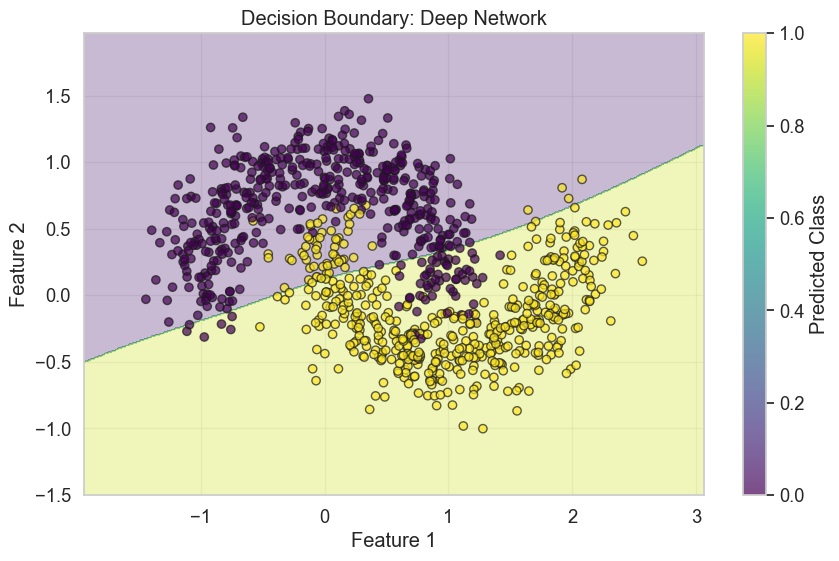


Training model: Wide Network
Epoch 1/300 - loss: 0.5948 - val_loss: 0.5970
Epoch 11/300 - loss: 0.5086 - val_loss: 0.5207
Epoch 21/300 - loss: 0.4616 - val_loss: 0.4776
Epoch 31/300 - loss: 0.4317 - val_loss: 0.4493
Epoch 41/300 - loss: 0.4109 - val_loss: 0.4289
Epoch 51/300 - loss: 0.3954 - val_loss: 0.4133
Epoch 61/300 - loss: 0.3834 - val_loss: 0.4008
Epoch 71/300 - loss: 0.3736 - val_loss: 0.3905
Epoch 81/300 - loss: 0.3655 - val_loss: 0.3818
Epoch 91/300 - loss: 0.3587 - val_loss: 0.3744
Epoch 101/300 - loss: 0.3528 - val_loss: 0.3679
Epoch 111/300 - loss: 0.3477 - val_loss: 0.3622
Epoch 121/300 - loss: 0.3432 - val_loss: 0.3571
Epoch 131/300 - loss: 0.3392 - val_loss: 0.3525
Epoch 141/300 - loss: 0.3357 - val_loss: 0.3484
Epoch 151/300 - loss: 0.3325 - val_loss: 0.3447
Epoch 161/300 - loss: 0.3296 - val_loss: 0.3414
Epoch 171/300 - loss: 0.3270 - val_loss: 0.3383
Epoch 181/300 - loss: 0.3247 - val_loss: 0.3355
Epoch 191/300 - loss: 0.3225 - val_loss: 0.3329
Epoch 201/300 - loss:

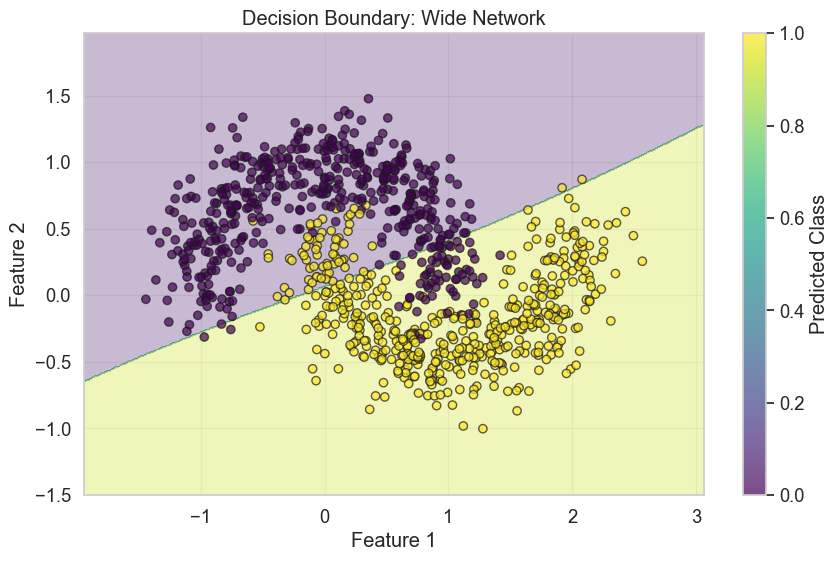


Training model: High Learning Rate
Epoch 1/300 - loss: 0.7212 - val_loss: 0.6725
Epoch 11/300 - loss: 0.3927 - val_loss: 0.4037
Epoch 21/300 - loss: 0.3388 - val_loss: 0.3488
Epoch 31/300 - loss: 0.3192 - val_loss: 0.3264
Epoch 41/300 - loss: 0.3095 - val_loss: 0.3150
Epoch 51/300 - loss: 0.3042 - val_loss: 0.3085
Epoch 61/300 - loss: 0.3011 - val_loss: 0.3045
Epoch 71/300 - loss: 0.2992 - val_loss: 0.3019
Epoch 81/300 - loss: 0.2976 - val_loss: 0.3001
Epoch 91/300 - loss: 0.2965 - val_loss: 0.2987
Epoch 101/300 - loss: 0.2958 - val_loss: 0.2978
Epoch 111/300 - loss: 0.2952 - val_loss: 0.2969
Epoch 121/300 - loss: 0.2946 - val_loss: 0.2962
Epoch 131/300 - loss: 0.2943 - val_loss: 0.2956
Epoch 141/300 - loss: 0.2937 - val_loss: 0.2950
Epoch 151/300 - loss: 0.2932 - val_loss: 0.2944
Epoch 161/300 - loss: 0.2927 - val_loss: 0.2937
Epoch 171/300 - loss: 0.2921 - val_loss: 0.2930
Epoch 181/300 - loss: 0.2916 - val_loss: 0.2921
Epoch 191/300 - loss: 0.2907 - val_loss: 0.2910
Epoch 201/300 -

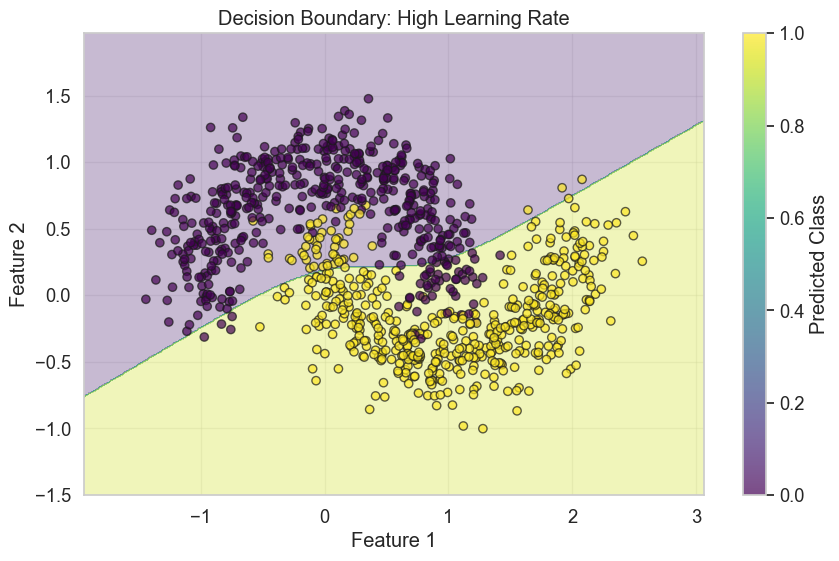


Training model: Low Learning Rate
Epoch 1/300 - loss: 1.0105 - val_loss: 0.9916
Epoch 11/300 - loss: 0.9863 - val_loss: 0.9690
Epoch 21/300 - loss: 0.9627 - val_loss: 0.9470
Epoch 31/300 - loss: 0.9399 - val_loss: 0.9257
Epoch 41/300 - loss: 0.9177 - val_loss: 0.9049
Epoch 51/300 - loss: 0.8962 - val_loss: 0.8849
Epoch 61/300 - loss: 0.8754 - val_loss: 0.8655
Epoch 71/300 - loss: 0.8554 - val_loss: 0.8468
Epoch 81/300 - loss: 0.8362 - val_loss: 0.8288
Epoch 91/300 - loss: 0.8176 - val_loss: 0.8115
Epoch 101/300 - loss: 0.7999 - val_loss: 0.7949
Epoch 111/300 - loss: 0.7828 - val_loss: 0.7790
Epoch 121/300 - loss: 0.7665 - val_loss: 0.7638
Epoch 131/300 - loss: 0.7508 - val_loss: 0.7492
Epoch 141/300 - loss: 0.7359 - val_loss: 0.7352
Epoch 151/300 - loss: 0.7216 - val_loss: 0.7219
Epoch 161/300 - loss: 0.7079 - val_loss: 0.7091
Epoch 171/300 - loss: 0.6949 - val_loss: 0.6969
Epoch 181/300 - loss: 0.6824 - val_loss: 0.6852
Epoch 191/300 - loss: 0.6705 - val_loss: 0.6741
Epoch 201/300 - 

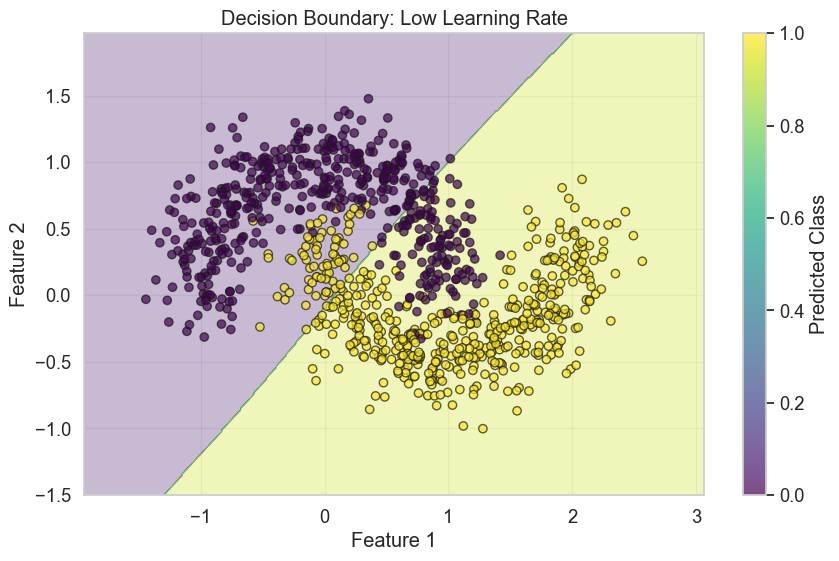


Training model: ReLU Activation
Epoch 1/300 - loss: 0.7270 - val_loss: 0.7165
Epoch 11/300 - loss: 0.6351 - val_loss: 0.6330
Epoch 21/300 - loss: 0.5704 - val_loss: 0.5730
Epoch 31/300 - loss: 0.5230 - val_loss: 0.5286
Epoch 41/300 - loss: 0.4875 - val_loss: 0.4948
Epoch 51/300 - loss: 0.4601 - val_loss: 0.4685
Epoch 61/300 - loss: 0.4384 - val_loss: 0.4478
Epoch 71/300 - loss: 0.4210 - val_loss: 0.4311
Epoch 81/300 - loss: 0.4070 - val_loss: 0.4174
Epoch 91/300 - loss: 0.3955 - val_loss: 0.4061
Epoch 101/300 - loss: 0.3858 - val_loss: 0.3965
Epoch 111/300 - loss: 0.3775 - val_loss: 0.3882
Epoch 121/300 - loss: 0.3705 - val_loss: 0.3809
Epoch 131/300 - loss: 0.3642 - val_loss: 0.3744
Epoch 141/300 - loss: 0.3587 - val_loss: 0.3686
Epoch 151/300 - loss: 0.3537 - val_loss: 0.3634
Epoch 161/300 - loss: 0.3493 - val_loss: 0.3587
Epoch 171/300 - loss: 0.3451 - val_loss: 0.3544
Epoch 181/300 - loss: 0.3414 - val_loss: 0.3504
Epoch 191/300 - loss: 0.3381 - val_loss: 0.3468
Epoch 201/300 - lo

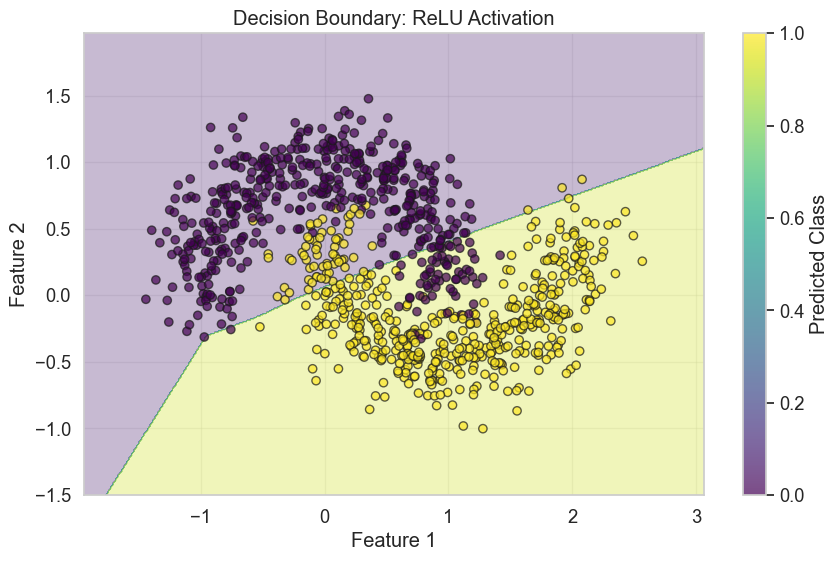


Training model: Large Batch Size
Epoch 1/300 - loss: 0.7812 - val_loss: 0.7887
Epoch 11/300 - loss: 0.7293 - val_loss: 0.7473
Epoch 21/300 - loss: 0.6902 - val_loss: 0.7104
Epoch 31/300 - loss: 0.6595 - val_loss: 0.6782
Epoch 41/300 - loss: 0.6278 - val_loss: 0.6495
Epoch 51/300 - loss: 0.6028 - val_loss: 0.6249
Epoch 61/300 - loss: 0.5797 - val_loss: 0.6031
Epoch 71/300 - loss: 0.5581 - val_loss: 0.5841
Epoch 81/300 - loss: 0.5377 - val_loss: 0.5673
Epoch 91/300 - loss: 0.5261 - val_loss: 0.5524
Epoch 101/300 - loss: 0.5112 - val_loss: 0.5390
Epoch 111/300 - loss: 0.5070 - val_loss: 0.5269
Epoch 121/300 - loss: 0.4920 - val_loss: 0.5158
Epoch 131/300 - loss: 0.4879 - val_loss: 0.5057
Epoch 141/300 - loss: 0.4647 - val_loss: 0.4967
Epoch 151/300 - loss: 0.4599 - val_loss: 0.4883
Epoch 161/300 - loss: 0.4664 - val_loss: 0.4806
Epoch 171/300 - loss: 0.4609 - val_loss: 0.4735
Epoch 181/300 - loss: 0.4474 - val_loss: 0.4669
Epoch 191/300 - loss: 0.4367 - val_loss: 0.4607
Epoch 201/300 - l

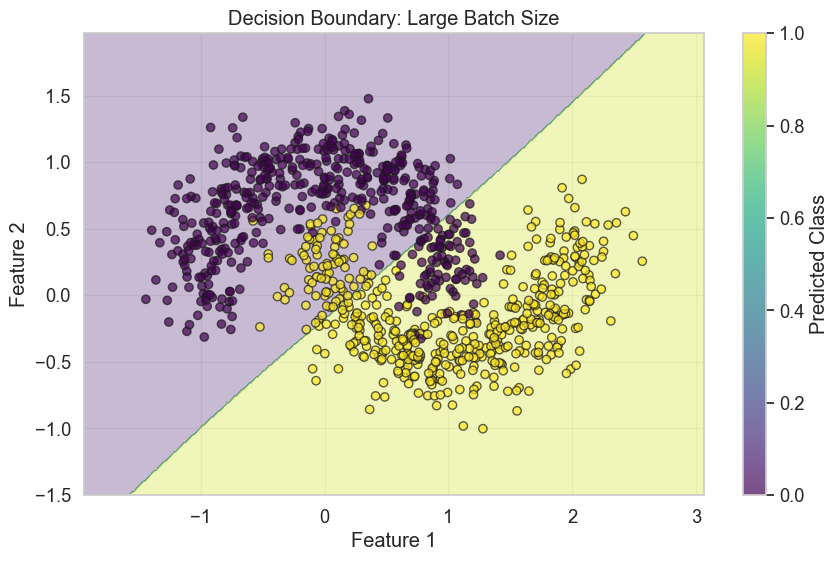


Hyperparameter Comparison Results:
                 name accuracy train_loss val_loss training_time
3  High Learning Rate   0.8900     0.2629   0.2575         0.35s
1        Deep Network   0.8650     0.3014   0.3051         0.58s
2        Wide Network   0.8650     0.3076   0.3144         0.38s
5     ReLU Activation   0.8600     0.3145   0.3210         0.34s
0            Baseline   0.8550     0.3158   0.3237         0.33s
6    Large Batch Size   0.7950     0.3931   0.4123         0.18s
4   Low Learning Rate   0.7750     0.5704   0.5805         0.33s


In [36]:

def compare_hyperparameters():
    """Compare the impact of different hyperparameters on model performance"""
    # Generate data
    X, y = generate_data('moons', n_samples=1000)
    
    # Reshape y to match output layer shape
    y = y.reshape(-1, 1)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define hyperparameter configurations to compare
    # Each configuration is a tuple: (name, hyperparameter_dict)
    hyperparameter_configs = [
        # Baseline configuration
        ("Baseline", {
            "layer_sizes": [2, 8, 1],
            "epochs": 300,
            "batch_size": 32,
            "learning_rate": 0.01,
            "activation_function": tanh,
            "activation_derivative": tanh_derivative,
            "output_activation": sigmoid,
            "output_activation_derivative": sigmoid_derivative
        }),
        
        # More layers
        ("Deep Network", {
            "layer_sizes": [2, 8, 8, 8, 1],
            "epochs": 300,
            "batch_size": 32,
            "learning_rate": 0.01,
            "activation_function": tanh,
            "activation_derivative": tanh_derivative,
            "output_activation": sigmoid,
            "output_activation_derivative": sigmoid_derivative
        }),
        
        # Wider layers
        ("Wide Network", {
            "layer_sizes": [2, 32, 1],
            "epochs": 300,
            "batch_size": 32,
            "learning_rate": 0.01,
            "activation_function": tanh,
            "activation_derivative": tanh_derivative,
            "output_activation": sigmoid,
            "output_activation_derivative": sigmoid_derivative
        }),
        
        # Higher learning rate
        ("High Learning Rate", {
            "layer_sizes": [2, 8, 1],
            "epochs": 300,
            "batch_size": 32,
            "learning_rate": 0.1,
            "activation_function": tanh,
            "activation_derivative": tanh_derivative,
            "output_activation": sigmoid,
            "output_activation_derivative": sigmoid_derivative
        }),
        
        # Lower learning rate
        ("Low Learning Rate", {
            "layer_sizes": [2, 8, 1],
            "epochs": 300,
            "batch_size": 32,
            "learning_rate": 0.001,
            "activation_function": tanh,
            "activation_derivative": tanh_derivative,
            "output_activation": sigmoid,
            "output_activation_derivative": sigmoid_derivative
        }),
        
        # Different activation function
        ("ReLU Activation", {
            "layer_sizes": [2, 8, 1],
            "epochs": 300,
            "batch_size": 32,
            "learning_rate": 0.01,
            "activation_function": relu,
            "activation_derivative": relu_derivative,
            "output_activation": sigmoid,
            "output_activation_derivative": sigmoid_derivative
        }),
        
        # Larger batch size
        ("Large Batch Size", {
            "layer_sizes": [2, 8, 1],
            "epochs": 300,
            "batch_size": 128,
            "learning_rate": 0.01,
            "activation_function": tanh,
            "activation_derivative": tanh_derivative,
            "output_activation": sigmoid,
            "output_activation_derivative": sigmoid_derivative
        })
    ]
    
    # Train models with different hyperparameters and collect results
    results = []
    
    for name, params in hyperparameter_configs:
        print(f"\nTraining model: {name}")
        
        # Create the neural network
        nn = NeuralNetwork(params["layer_sizes"])
        
        # Track training time
        start_time = time.time()
        
        # Train the model
        history = nn.fit(
            X_train, y_train,
            epochs=params["epochs"],
            batch_size=params["batch_size"],
            learning_rate=params["learning_rate"],
            activation_function=params["activation_function"],
            activation_derivative=params["activation_derivative"],
            output_activation=params["output_activation"],
            output_activation_derivative=params["output_activation_derivative"],
            loss_function=binary_cross_entropy,
            validation_data=(X_test, y_test),
            verbose=True
        )
        
        # Calculate training time
        training_time = time.time() - start_time
        
        # Make predictions
        y_pred = nn.predict(X_test, params["activation_function"], params["output_activation"])
        y_pred_binary = (y_pred > 0.5).astype(int)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred_binary)
        
        # Get final loss values
        train_loss = history["loss"][-1]
        val_loss = history["val_loss"][-1]
        
        # Store results
        results.append({
            "name": name,
            "accuracy": accuracy,
            "train_loss": train_loss,
            "val_loss": val_loss,
            "training_time": training_time
        })
        
        # Plot decision boundary
        plot_decision_boundary(
            X, y.reshape(-1), nn, 
            params["activation_function"], 
            params["output_activation"], 
            f'Decision Boundary: {name}'
        )
    
    # Create a summary table
    results_df = pd.DataFrame(results)
    
    # Format the results for display
    results_df["accuracy"] = results_df["accuracy"].apply(lambda x: f"{x:.4f}")
    results_df["train_loss"] = results_df["train_loss"].apply(lambda x: f"{x:.4f}")
    results_df["val_loss"] = results_df["val_loss"].apply(lambda x: f"{x:.4f}")
    results_df["training_time"] = results_df["training_time"].apply(lambda x: f"{x:.2f}s")
    
    # Sort by accuracy (descending)
    results_df = results_df.sort_values("accuracy", ascending=False)
    
    # Display the results
    print("\nHyperparameter Comparison Results:")
    print(results_df)
    
    return results_df

# Compare different hyperparameter configurations
hyperparameter_results = compare_hyperparameters()


### Key Hyperparameters and Their Effects

Let's summarize the key hyperparameters and their impact on neural network performance:

#### Network Architecture

1. **Number of Hidden Layers**:
   - **Shallow Networks (1-2 layers)**: Suitable for simple problems with clear patterns
   - **Deep Networks (3+ layers)**: Can learn more complex features and representations
   - **Impact**: More layers can lead to better feature extraction but may increase the risk of overfitting and vanishing/exploding gradients

2. **Number of Neurons per Layer**:
   - **Narrow Layers**: Faster training, simpler model
   - **Wide Layers**: Can capture more complex patterns in a single layer
   - **Impact**: More neurons increase model capacity but may lead to overfitting if too many

#### Training Parameters

3. **Learning Rate**:
   - **High Learning Rate**: Faster convergence but may overshoot minima
   - **Low Learning Rate**: More stable but slower convergence
   - **Impact**: Critical for successful training; too high can cause divergence, too low can cause slow or incomplete learning

4. **Batch Size**:
   - **Small Batch Size**: More frequent updates, more noise, better generalization
   - **Large Batch Size**: Faster training, more stable gradient estimates
   - **Impact**: Affects training speed and the noise level in gradient updates

5. **Number of Epochs**:
   - **Impact**: Determines how many times the model will see the entire dataset
   - **Too Few**: Underfitting
   - **Too Many**: Overfitting (without regularization)

#### Activation Functions

6. **Hidden Layer Activation Functions**:
   - **Sigmoid**: Smooth but suffers from vanishing gradient
   - **Tanh**: Zero-centered but still has vanishing gradient issue
   - **ReLU**: Faster training, addresses vanishing gradient, but can suffer from "dying ReLU"
   - **Leaky ReLU**: Addresses dying ReLU problem
   - **Impact**: Affects the network's ability to learn non-linear patterns

7. **Output Layer Activation Functions**:
   - **Sigmoid**: Binary classification (0-1)
   - **Softmax**: Multi-class classification (probabilities that sum to 1)
   - **Linear (None)**: Regression
   - **Impact**: Must match the task type

#### Regularization Parameters

8. **Regularization Strength (L1, L2)**:
   - **Impact**: Controls model complexity; higher values create simpler models
   - **L1**: Encourages sparse weights (feature selection)
   - **L2**: Penalizes large weights (weight decay)

9. **Dropout Rate**:
   - **Impact**: Prevents co-adaptation of neurons; higher rates mean more regularization
   - **Too Low**: Minimal regularization effect
   - **Too High**: Underfitting due to excessive information loss

### Visualization of Hyperparameter Effects

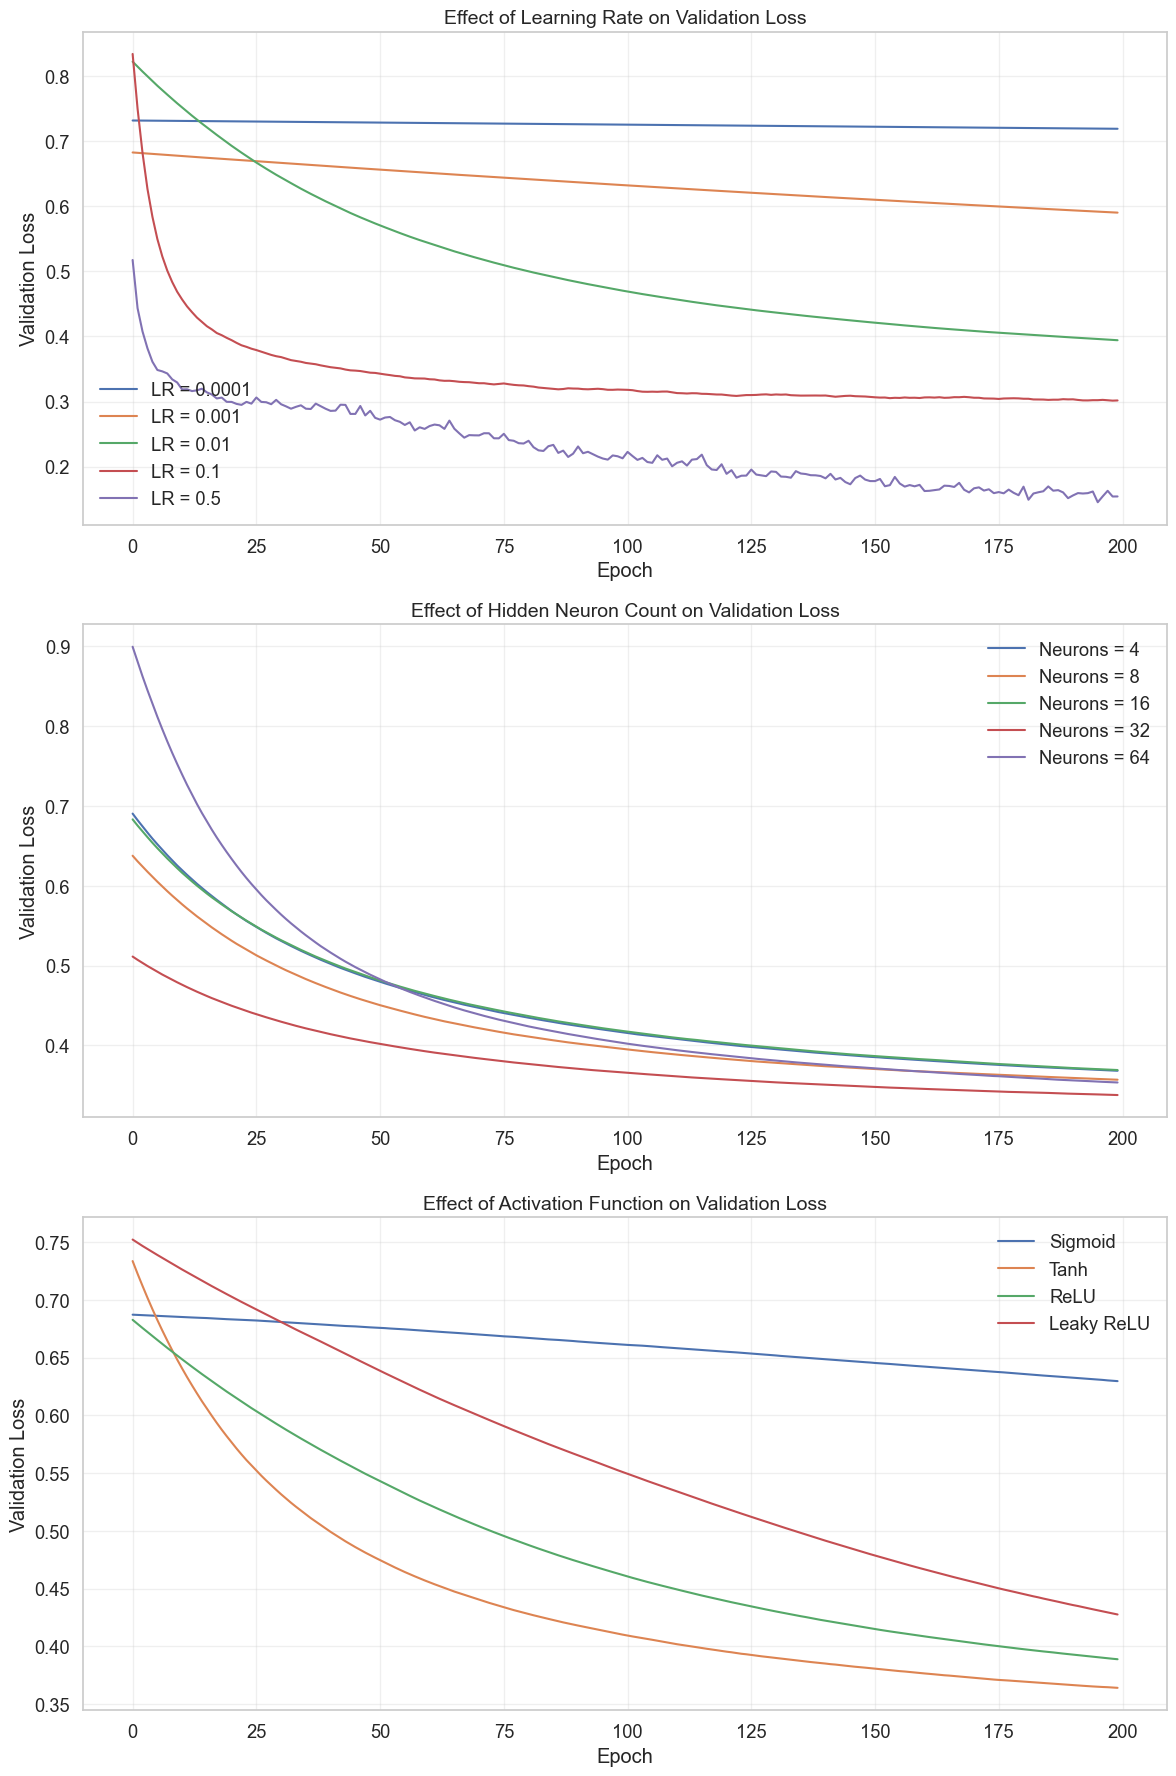

In [37]:

def visualize_hyperparameter_effects():
    """Visualize the effects of various hyperparameters on model performance"""
    # Create synthetic data for quick training
    X, y = generate_data('moons', n_samples=500)
    y = y.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Learning Rate Comparison
    learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]
    lr_histories = []
    
    for lr in learning_rates:
        nn = NeuralNetwork([2, 8, 1])
        history = nn.fit(
            X_train, y_train,
            epochs=200,
            batch_size=32,
            learning_rate=lr,
            activation_function=tanh,
            activation_derivative=tanh_derivative,
            output_activation=sigmoid,
            output_activation_derivative=sigmoid_derivative,
            loss_function=binary_cross_entropy,
            validation_data=(X_test, y_test),
            verbose=False
        )
        lr_histories.append((f"LR = {lr}", history))
    
    # Neuron Count Comparison
    hidden_neurons = [4, 8, 16, 32, 64]
    neuron_histories = []
    
    for neurons in hidden_neurons:
        nn = NeuralNetwork([2, neurons, 1])
        history = nn.fit(
            X_train, y_train,
            epochs=200,
            batch_size=32,
            learning_rate=0.01,
            activation_function=tanh,
            activation_derivative=tanh_derivative,
            output_activation=sigmoid,
            output_activation_derivative=sigmoid_derivative,
            loss_function=binary_cross_entropy,
            validation_data=(X_test, y_test),
            verbose=False
        )
        neuron_histories.append((f"Neurons = {neurons}", history))
    
    # Activation Function Comparison
    activation_functions = [
        ("Sigmoid", sigmoid, sigmoid_derivative),
        ("Tanh", tanh, tanh_derivative),
        ("ReLU", relu, relu_derivative),
        ("Leaky ReLU", lambda x: leaky_relu(x), lambda x: leaky_relu_derivative(x))
    ]
    activation_histories = []
    
    for name, act_fn, act_deriv in activation_functions:
        nn = NeuralNetwork([2, 8, 1])
        history = nn.fit(
            X_train, y_train,
            epochs=200,
            batch_size=32,
            learning_rate=0.01,
            activation_function=act_fn,
            activation_derivative=act_deriv,
            output_activation=sigmoid,
            output_activation_derivative=sigmoid_derivative,
            loss_function=binary_cross_entropy,
            validation_data=(X_test, y_test),
            verbose=False
        )
        activation_histories.append((name, history))
    
    # Create plots
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))
    
    # Plot learning rate comparison
    for name, history in lr_histories:
        axs[0].plot(history['val_loss'], label=name)
    
    axs[0].set_title('Effect of Learning Rate on Validation Loss', fontsize=14)
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Validation Loss')
    axs[0].legend()
    axs[0].grid(True, alpha=0.3)
    
    # Plot neuron count comparison
    for name, history in neuron_histories:
        axs[1].plot(history['val_loss'], label=name)
    
    axs[1].set_title('Effect of Hidden Neuron Count on Validation Loss', fontsize=14)
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Validation Loss')
    axs[1].legend()
    axs[1].grid(True, alpha=0.3)
    
    # Plot activation function comparison
    for name, history in activation_histories:
        axs[2].plot(history['val_loss'], label=name)
    
    axs[2].set_title('Effect of Activation Function on Validation Loss', fontsize=14)
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('Validation Loss')
    axs[2].legend()
    axs[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualize hyperparameter effects
visualize_hyperparameter_effects()


## 6. Best Practices for Neural Network Design

Based on our experiments and industry standards, here are some best practices for designing and training neural networks:

### Architecture Design

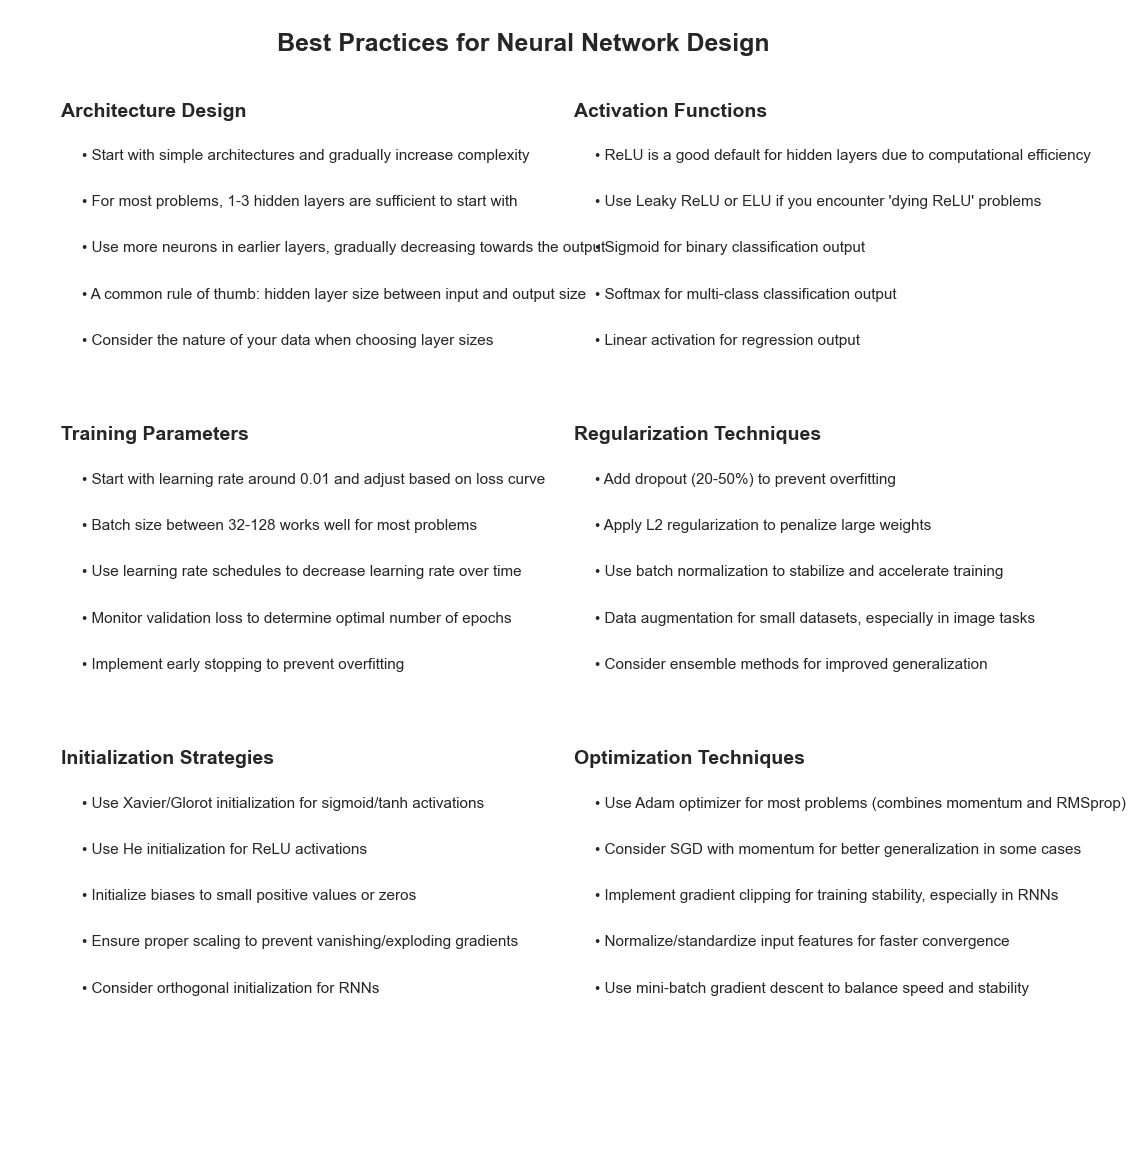

In [38]:

def display_best_practices():
    """Display best practices for neural network design"""
    # Create a figure for the visualization
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Hide axes
    ax.axis('off')
    
    # Add title
    ax.text(0.5, 0.98, 'Best Practices for Neural Network Design', 
            fontsize=18, ha='center', va='top', weight='bold')
    
    # Create sections
    sections = [
        ("Architecture Design", [
            "Start with simple architectures and gradually increase complexity",
            "For most problems, 1-3 hidden layers are sufficient to start with",
            "Use more neurons in earlier layers, gradually decreasing towards the output",
            "A common rule of thumb: hidden layer size between input and output size",
            "Consider the nature of your data when choosing layer sizes"
        ]),
        
        ("Activation Functions", [
            "ReLU is a good default for hidden layers due to computational efficiency",
            "Use Leaky ReLU or ELU if you encounter 'dying ReLU' problems",
            "Sigmoid for binary classification output",
            "Softmax for multi-class classification output",
            "Linear activation for regression output"
        ]),
        
        ("Training Parameters", [
            "Start with learning rate around 0.01 and adjust based on loss curve",
            "Batch size between 32-128 works well for most problems",
            "Use learning rate schedules to decrease learning rate over time",
            "Monitor validation loss to determine optimal number of epochs",
            "Implement early stopping to prevent overfitting"
        ]),
        
        ("Regularization Techniques", [
            "Add dropout (20-50%) to prevent overfitting",
            "Apply L2 regularization to penalize large weights",
            "Use batch normalization to stabilize and accelerate training",
            "Data augmentation for small datasets, especially in image tasks",
            "Consider ensemble methods for improved generalization"
        ]),
        
        ("Initialization Strategies", [
            "Use Xavier/Glorot initialization for sigmoid/tanh activations",
            "Use He initialization for ReLU activations",
            "Initialize biases to small positive values or zeros",
            "Ensure proper scaling to prevent vanishing/exploding gradients",
            "Consider orthogonal initialization for RNNs"
        ]),
        
        ("Optimization Techniques", [
            "Use Adam optimizer for most problems (combines momentum and RMSprop)",
            "Consider SGD with momentum for better generalization in some cases",
            "Implement gradient clipping for training stability, especially in RNNs",
            "Normalize/standardize input features for faster convergence",
            "Use mini-batch gradient descent to balance speed and stability"
        ])
    ]
    
    # Calculate layout
    n_sections = len(sections)
    n_rows = (n_sections + 1) // 2
    
    # Draw sections
    for i, (title, practices) in enumerate(sections):
        row = i // 2
        col = i % 2
        
        # Calculate position
        x_base = col * 0.5 + 0.05
        y_base = 0.92 - row * 0.28
        
        # Draw section title
        ax.text(x_base, y_base, title, 
                fontsize=14, ha='left', va='top', weight='bold')
        
        # Draw practices
        for j, practice in enumerate(practices):
            y_offset = 0.04 + j * 0.04
            ax.text(x_base + 0.02, y_base - y_offset, "• " + practice, 
                    fontsize=11, ha='left', va='top')
    
    plt.tight_layout()
    plt.show()

# Display neural network design best practices
display_best_practices()



### Best Practices in Practice: A Checklist

Here's a practical checklist to follow when designing and training neural networks:

1. **Data Preparation**:
   - Normalize/standardize input features
   - Split data into training, validation, and test sets
   - Consider data augmentation for small datasets
   - Check for class imbalance and address if needed

2. **Architecture Selection**:
   - Start with a simple model that's appropriate for your problem
   - Choose the right number of layers and neurons
   - Select appropriate activation functions
   - Configure the output layer to match your task

3. **Training Setup**:
   - Set a reasonable learning rate (0.001 - 0.01 is often a good starting point)
   - Choose an appropriate batch size (32-128 is common)
   - Select a suitable optimizer (Adam is a good default)
   - Implement appropriate regularization techniques

4. **Training Process**:
   - Monitor both training and validation loss
   - Implement early stopping to prevent overfitting
   - Use learning rate schedules if training plateaus
   - Save the best model based on validation performance

5. **Evaluation and Iteration**:
   - Evaluate on the test set only after final model selection
   - Analyze model performance with appropriate metrics
   - Diagnose overfitting or underfitting
   - Iterate on architecture and hyperparameters as needed

## 7. Visualizing Neural Network Learning

Let's visualize how neural networks learn over time:

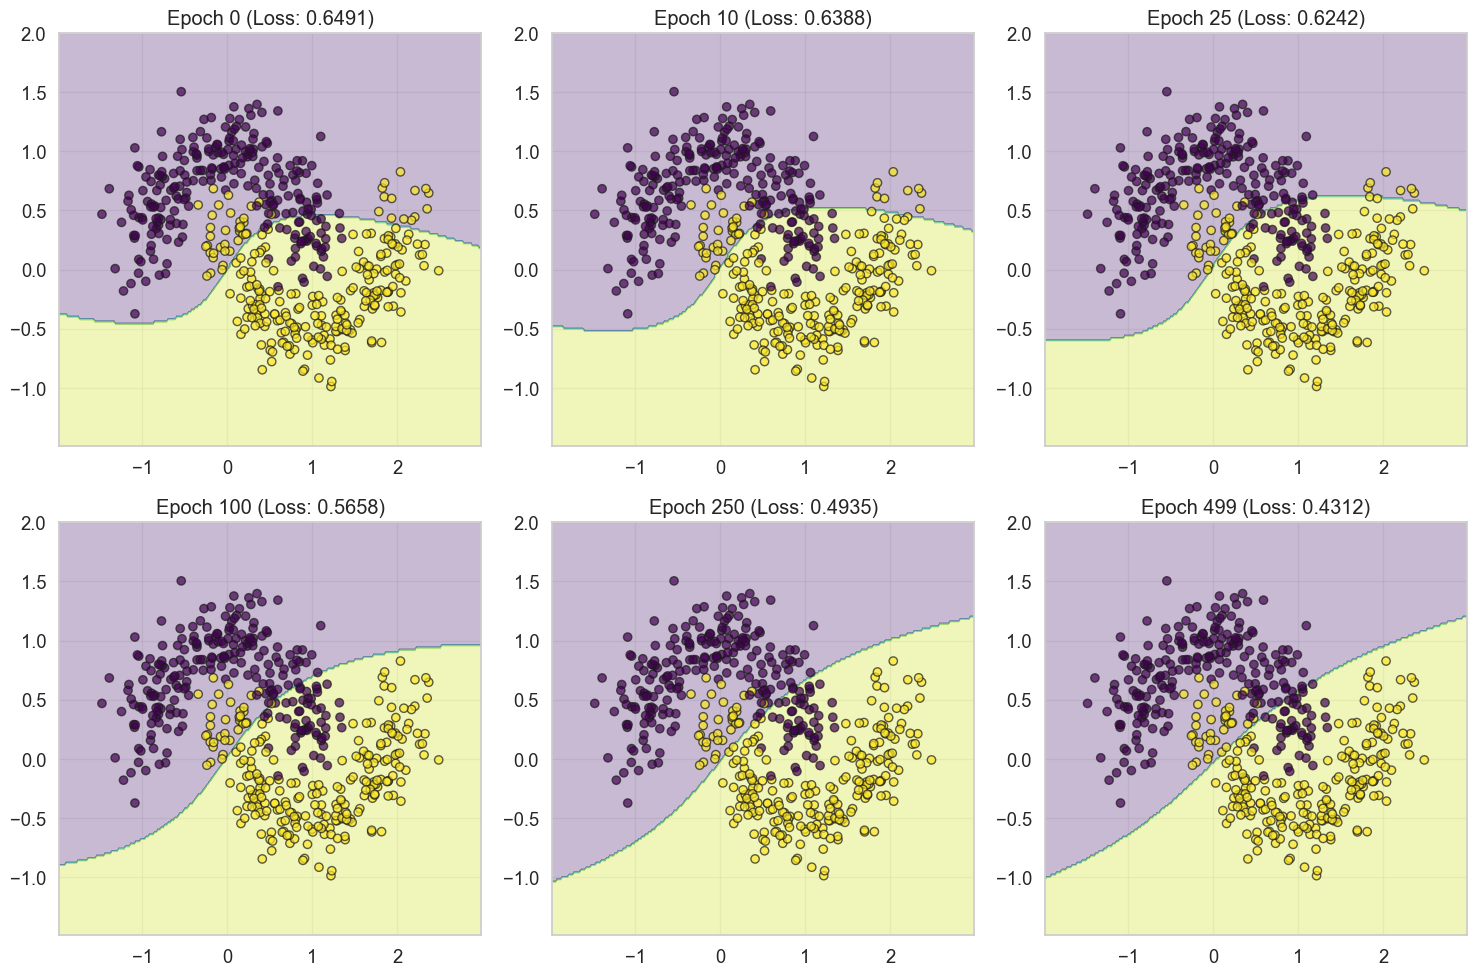

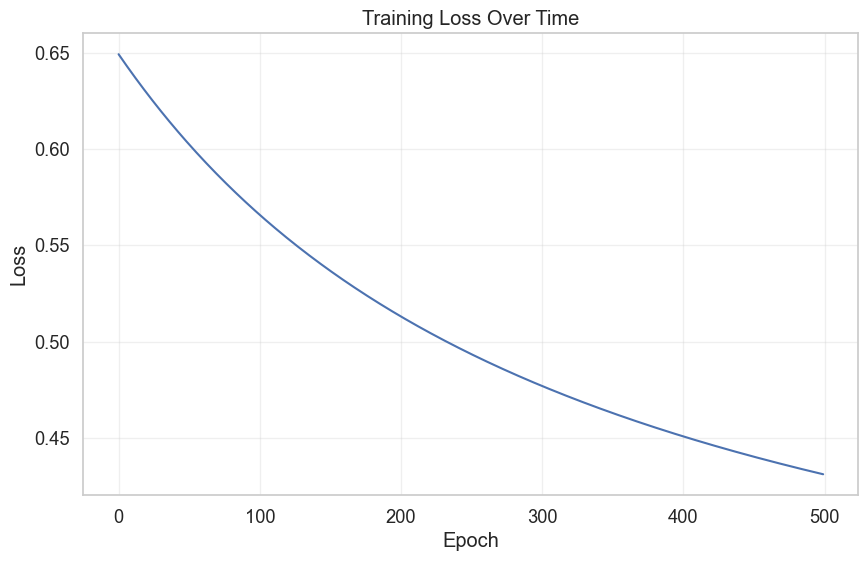

Epochs saved: [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
Number of weight snapshots: 16


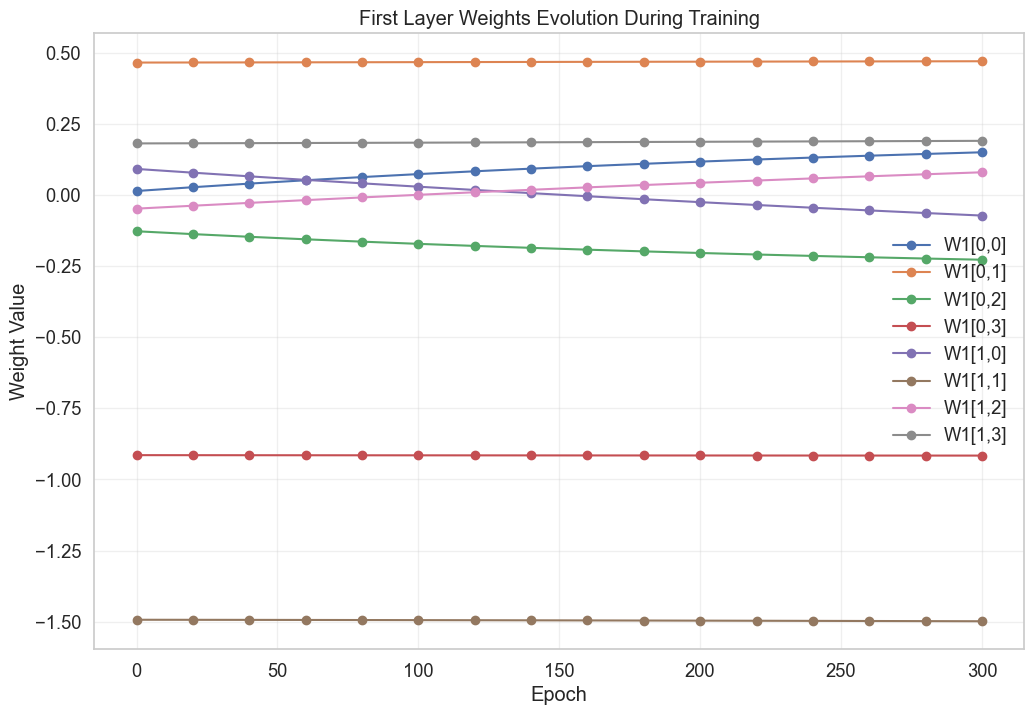

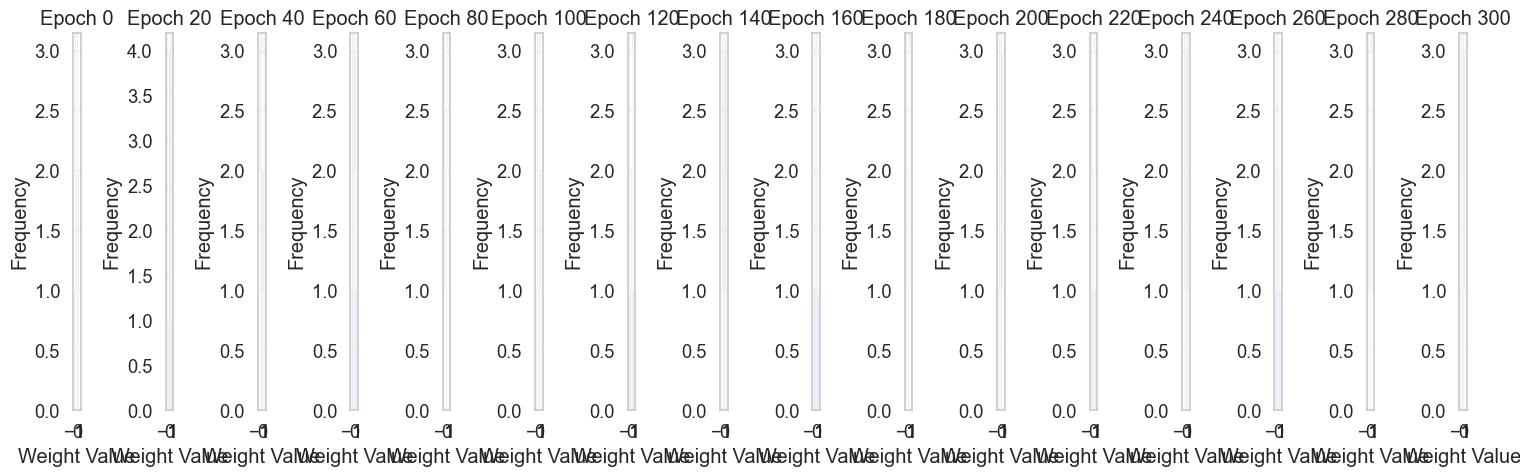

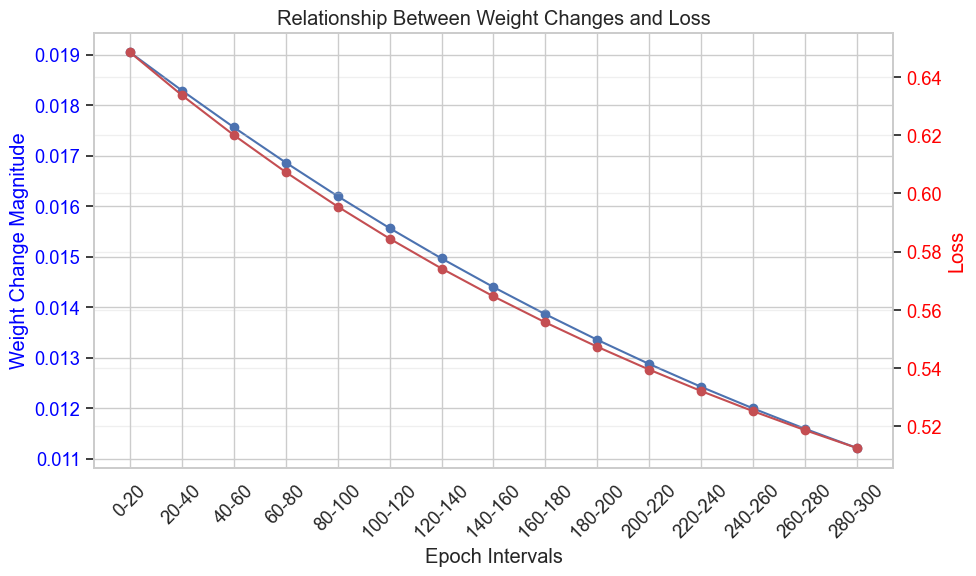

In [39]:
def visualize_learning_process():
    """Visualize how neural networks learn over time by showing decision boundary evolution"""
    # Generate data
    X, y = generate_data('moons', n_samples=500)
    y = y.reshape(-1, 1)
    
    # Create a neural network
    nn = NeuralNetwork([2, 16, 8, 1])
    
    # Set up the plot
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.flatten()
    
    # Training parameters
    epochs = 500
    epoch_checkpoints = [0, 10, 25, 100, 250, 499]  # Epochs to visualize
    
    # Store loss history
    loss_history = []
    
    # Training loop
    for epoch in range(epochs):
        # Perform a training step
        loss = nn.train_step(
            X, y,
            learning_rate=0.01,
            activation_function=tanh,
            activation_derivative=tanh_derivative,
            output_activation=sigmoid,
            output_activation_derivative=sigmoid_derivative,
            loss_function=binary_cross_entropy
        )
        
        loss_history.append(loss)
        
        # Visualize at checkpoints
        if epoch in epoch_checkpoints:
            idx = epoch_checkpoints.index(epoch)
            
            # Define the grid range
            x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
            
            # Create a meshgrid
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                               np.arange(y_min, y_max, 0.02))
            
            # Make predictions on the meshgrid points
            grid_points = np.c_[xx.ravel(), yy.ravel()]
            Z = nn.predict(grid_points, tanh, sigmoid)
            Z = (Z > 0.5).astype(int)
            Z = Z.reshape(xx.shape)
            
            # Plot the decision boundary and data points
            axs[idx].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
            axs[idx].scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap='viridis', 
                           edgecolors='k', alpha=0.7)
            axs[idx].set_title(f'Epoch {epoch} (Loss: {loss:.4f})')
            axs[idx].set_xlim(x_min, x_max)
            axs[idx].set_ylim(y_min, y_max)
            axs[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Plot loss history
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.grid(True, alpha=0.3)
    plt.show()

def visualize_weights_evolution():
    """Visualize how weights evolve during training"""
    # Generate data
    X, y = generate_data('moons', n_samples=300)
    y = y.reshape(-1, 1)
    
    # Create a small neural network for clearer visualization
    nn = NeuralNetwork([2, 4, 1])
    
    # Store weights history
    weights_history = []
    loss_history = []
    epochs_saved = []  # Track exact epochs where we save weights
    
    # Save initial weights (before training)
    initial_weights = [w.copy() for w in nn.weights]
    weights_history.append(initial_weights)
    epochs_saved.append(0)  # Epoch 0
    
    # Training loop
    epochs = 300
    for epoch in range(epochs):
        # Perform a training step
        loss = nn.train_step(
            X, y,
            learning_rate=0.01,
            activation_function=tanh,
            activation_derivative=tanh_derivative,
            output_activation=sigmoid,
            output_activation_derivative=sigmoid_derivative,
            loss_function=binary_cross_entropy
        )
        
        loss_history.append(loss)
        
        # Store weights every 20 epochs
        if (epoch + 1) % 20 == 0 or epoch == epochs - 1:
            current_weights = [w.copy() for w in nn.weights]
            weights_history.append(current_weights)
            epochs_saved.append(epoch + 1)  # Save current epoch number
    
    print(f"Epochs saved: {epochs_saved}")
    print(f"Number of weight snapshots: {len(weights_history)}")
    
    # Visualize weight evolution for the first layer
    plt.figure(figsize=(12, 8))
    
    # Plot each weight separately
    for i in range(nn.weights[0].shape[0]):  # Input features
        for j in range(nn.weights[0].shape[1]):  # Hidden neurons
            weight_values = [weights[0][i, j] for weights in weights_history]
            # Make sure the dimensions match
            plt.plot(
                epochs_saved,  # Use saved epoch numbers for x-axis
                weight_values,  # Y-axis: weight values
                marker='o',
                label=f'W1[{i},{j}]'
            )
    
    plt.xlabel('Epoch')
    plt.ylabel('Weight Value')
    plt.title('First Layer Weights Evolution During Training')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Visualize weight distributions at different epochs
    fig, axs = plt.subplots(1, len(weights_history), figsize=(15, 5))
    
    for i, weights in enumerate(weights_history):
        # Flatten all weights into a single array
        all_weights = np.concatenate([w.flatten() for w in weights])
        
        # Plot histogram
        axs[i].hist(all_weights, bins=20, alpha=0.7)
        
        # Use actual epoch number
        axs[i].set_title(f'Epoch {epochs_saved[i]}')
        
        axs[i].set_xlabel('Weight Value')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Visualize the relationship between weight changes and loss
    # Compute weight change magnitude
    weight_changes = []
    for i in range(1, len(weights_history)):
        prev_weights = weights_history[i-1]
        curr_weights = weights_history[i]
        
        # Compute the Frobenius norm of weight changes for each layer
        layer_changes = []
        for prev_w, curr_w in zip(prev_weights, curr_weights):
            change = np.linalg.norm(curr_w - prev_w)
            layer_changes.append(change)
        
        weight_changes.append(np.mean(layer_changes))
    
    # We have one fewer weight change than weight snapshots
    change_epochs = [(epochs_saved[i], epochs_saved[i+1]) for i in range(len(epochs_saved)-1)]
    
    # For the loss plot, use the loss at the end of each interval
    interval_losses = [loss_history[e-1] for e in epochs_saved[1:]]
    
    # Plot weight changes and loss
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    ax1.set_xlabel('Epoch Intervals')
    ax1.set_ylabel('Weight Change Magnitude', color='blue')
    
    # Create x-tick labels showing the intervals
    x_ticks = range(len(weight_changes))
    x_labels = [f"{start}-{end}" for start, end in change_epochs]
    
    ax1.plot(x_ticks, weight_changes, 'bo-', label='Weight Change')
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(x_labels, rotation=45)
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Loss', color='red')
    ax2.plot(x_ticks, interval_losses, 'ro-', label='Loss')
    ax2.tick_params(axis='y', labelcolor='red')
    
    plt.title('Relationship Between Weight Changes and Loss')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Display neural network learning process
visualize_learning_process()

# Display neural network weights evolution
visualize_weights_evolution()


## 8. Advanced Topics and Extensions

Now that we understand the fundamentals of neural networks, let's briefly explore some advanced topics and extensions that build upon these basics.

### 8.1 Regularization Techniques

Regularization techniques help prevent overfitting by constraining the model's complexity:


In [40]:

def add_regularization():
    """Add L2 regularization to the backpropagation algorithm"""
    # Modify the backpropagation function to include L2 regularization
    def backpropagation_with_l2(y_true, y_pred, cache, weights, activation_derivative, 
                             output_activation_derivative=None, lambda_reg=0.01):
        """
        Backpropagation with L2 regularization
        
        Parameters:
        -----------
        y_true : array-like
            True target values
        y_pred : array-like
            Predicted values
        cache : dict
            Cache of values from forward propagation
        weights : list
            List of weight matrices
        activation_derivative : function
            Derivative of activation function
        output_activation_derivative : function, default=None
            Derivative of output activation function
        lambda_reg : float, default=0.01
            L2 regularization strength
            
        Returns:
        --------
        tuple
            (weight_gradients, bias_gradients)
        """
        activations = cache['activations']
        pre_activations = cache['pre_activations']
        
        # Initialize gradient lists
        weight_gradients = [None] * len(weights)
        bias_gradients = [None] * len(weights)
        
        # Compute initial error at the output layer
        delta = y_pred - y_true  # MSE derivative
        
        # Backpropagate the error
        for layer in reversed(range(len(weights))):
            # For the output layer, we might use a different activation function
            if layer == len(weights) - 1 and output_activation_derivative is not None:
                delta = delta * output_activation_derivative(pre_activations[layer])
            else:
                delta = delta * activation_derivative(pre_activations[layer])
            
            # Compute gradients for this layer
            weight_gradients[layer] = np.dot(activations[layer].T, delta) / delta.shape[0]
            
            # Add L2 regularization term to weight gradients
            weight_gradients[layer] += lambda_reg * weights[layer]
            
            bias_gradients[layer] = np.mean(delta, axis=0)
            
            # Compute delta for the previous layer (if not the input layer)
            if layer > 0:
                delta = np.dot(delta, weights[layer].T)
        
        return weight_gradients, bias_gradients
    
    return backpropagation_with_l2

# L2 regularization implementation
backprop_with_l2 = add_regularization()

def dropout_layer(X, dropout_rate):
    """
    Apply dropout to an input tensor
    
    Parameters:
    -----------
    X : array-like
        Input tensor
    dropout_rate : float
        Dropout rate (probability of setting a value to zero)
        
    Returns:
    --------
    tuple
        (output, mask)
        - output: X with dropout applied
        - mask: Binary mask used for dropout
    """
    # Create a binary mask with probability (1 - dropout_rate)
    mask = np.random.binomial(1, 1 - dropout_rate, size=X.shape) / (1 - dropout_rate)
    
    # Apply mask to input
    output = X * mask
    
    return output, mask


### 8.2 Optimization Algorithms

Various optimization algorithms can be used to improve neural network training:


In [41]:

def implement_optimizers():
    """Implement various optimization algorithms for neural networks"""
    
    class SGD:
        """Stochastic Gradient Descent optimizer"""
        def __init__(self, learning_rate=0.01, momentum=0.0):
            self.learning_rate = learning_rate
            self.momentum = momentum
            self.velocity = None
        
        def update(self, params, gradients):
            """
            Update parameters using SGD with momentum
            
            Parameters:
            -----------
            params : list
                List of parameter arrays to update
            gradients : list
                List of gradient arrays
                
            Returns:
            --------
            list
                Updated parameters
            """
            if self.velocity is None:
                self.velocity = [np.zeros_like(param) for param in params]
            
            updated_params = []
            for i, (param, grad) in enumerate(zip(params, gradients)):
                # Update velocity
                self.velocity[i] = self.momentum * self.velocity[i] - self.learning_rate * grad
                
                # Update parameter
                updated_param = param + self.velocity[i]
                updated_params.append(updated_param)
            
            return updated_params
    
    class Adam:
        """Adam optimizer"""
        def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
            self.learning_rate = learning_rate
            self.beta1 = beta1
            self.beta2 = beta2
            self.epsilon = epsilon
            self.m = None  # First moment estimate
            self.v = None  # Second moment estimate
            self.t = 0     # Timestep
        
        def update(self, params, gradients):
            """
            Update parameters using Adam
            
            Parameters:
            -----------
            params : list
                List of parameter arrays to update
            gradients : list
                List of gradient arrays
                
            Returns:
            --------
            list
                Updated parameters
            """
            if self.m is None:
                self.m = [np.zeros_like(param) for param in params]
                self.v = [np.zeros_like(param) for param in params]
            
            self.t += 1
            updated_params = []
            
            for i, (param, grad) in enumerate(zip(params, gradients)):
                # Update biased first moment estimate
                self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
                
                # Update biased second raw moment estimate
                self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * np.square(grad)
                
                # Compute bias-corrected first moment estimate
                m_corrected = self.m[i] / (1 - self.beta1 ** self.t)
                
                # Compute bias-corrected second raw moment estimate
                v_corrected = self.v[i] / (1 - self.beta2 ** self.t)
                
                # Update parameters
                updated_param = param - self.learning_rate * m_corrected / (np.sqrt(v_corrected) + self.epsilon)
                updated_params.append(updated_param)
            
            return updated_params
    
    class RMSprop:
        """RMSprop optimizer"""
        def __init__(self, learning_rate=0.001, decay_rate=0.9, epsilon=1e-8):
            self.learning_rate = learning_rate
            self.decay_rate = decay_rate
            self.epsilon = epsilon
            self.cache = None
        
        def update(self, params, gradients):
            """
            Update parameters using RMSprop
            
            Parameters:
            -----------
            params : list
                List of parameter arrays to update
            gradients : list
                List of gradient arrays
                
            Returns:
            --------
            list
                Updated parameters
            """
            if self.cache is None:
                self.cache = [np.zeros_like(param) for param in params]
            
            updated_params = []
            
            for i, (param, grad) in enumerate(zip(params, gradients)):
                # Update cache
                self.cache[i] = self.decay_rate * self.cache[i] + (1 - self.decay_rate) * np.square(grad)
                
                # Update parameters
                updated_param = param - self.learning_rate * grad / (np.sqrt(self.cache[i]) + self.epsilon)
                updated_params.append(updated_param)
            
            return updated_params
    
    return {
        'sgd': SGD,
        'adam': Adam,
        'rmsprop': RMSprop
    }

# Get optimizer implementations
optimizers = implement_optimizers()


### 8.3 Learning Rate Schedulers

Learning rate schedulers adjust the learning rate during training:


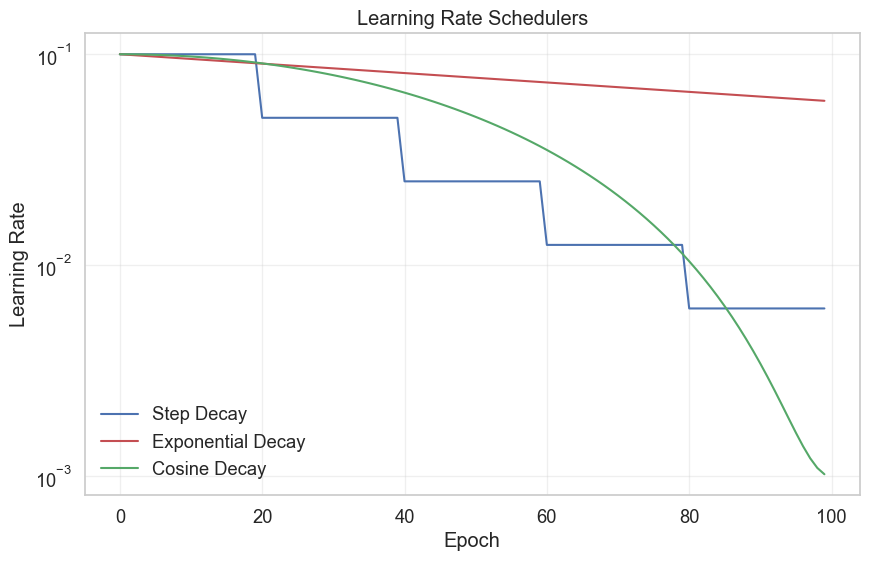

In [42]:

def implement_lr_schedulers():
    """Implement various learning rate schedulers"""
    
    class StepDecay:
        """Step decay learning rate scheduler"""
        def __init__(self, initial_lr=0.01, drop_factor=0.5, epochs_drop=10):
            self.initial_lr = initial_lr
            self.drop_factor = drop_factor
            self.epochs_drop = epochs_drop
        
        def get_lr(self, epoch):
            """
            Get learning rate for current epoch
            
            Parameter:
            ----------
            epoch : int
                Current epoch number
                
            Returns:
            --------
            float
                Learning rate for current epoch
            """
            exponent = int(epoch / self.epochs_drop)
            return self.initial_lr * (self.drop_factor ** exponent)
    
    class ExponentialDecay:
        """Exponential decay learning rate scheduler"""
        def __init__(self, initial_lr=0.01, decay_rate=0.96, decay_steps=100):
            self.initial_lr = initial_lr
            self.decay_rate = decay_rate
            self.decay_steps = decay_steps
        
        def get_lr(self, epoch):
            """
            Get learning rate for current epoch
            
            Parameter:
            ----------
            epoch : int
                Current epoch number
                
            Returns:
            --------
            float
                Learning rate for current epoch
            """
            return self.initial_lr * (self.decay_rate ** (epoch / self.decay_steps))
    
    class CosineDecay:
        """Cosine decay learning rate scheduler"""
        def __init__(self, initial_lr=0.01, min_lr=0.0, total_epochs=100):
            self.initial_lr = initial_lr
            self.min_lr = min_lr
            self.total_epochs = total_epochs
        
        def get_lr(self, epoch):
            """
            Get learning rate for current epoch using cosine decay
            
            Parameter:
            ----------
            epoch : int
                Current epoch number
                
            Returns:
            --------
            float
                Learning rate for current epoch
            """
            return self.min_lr + 0.5 * (self.initial_lr - self.min_lr) * (
                1 + np.cos(epoch * np.pi / self.total_epochs)
            )
    
    return {
        'step_decay': StepDecay,
        'exponential_decay': ExponentialDecay,
        'cosine_decay': CosineDecay
    }

# Get learning rate scheduler implementations
lr_schedulers = implement_lr_schedulers()

def visualize_lr_schedulers():
    """Visualize different learning rate schedulers"""
    # Create instances of learning rate schedulers
    step_decay = lr_schedulers['step_decay'](initial_lr=0.1, drop_factor=0.5, epochs_drop=20)
    exp_decay = lr_schedulers['exponential_decay'](initial_lr=0.1, decay_rate=0.95, decay_steps=10)
    cosine_decay = lr_schedulers['cosine_decay'](initial_lr=0.1, min_lr=0.001, total_epochs=100)
    
    # Generate learning rates for each epoch
    epochs = range(100)
    step_lrs = [step_decay.get_lr(epoch) for epoch in epochs]
    exp_lrs = [exp_decay.get_lr(epoch) for epoch in epochs]
    cosine_lrs = [cosine_decay.get_lr(epoch) for epoch in epochs]
    
    # Plot learning rate schedules
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, step_lrs, 'b-', label='Step Decay')
    plt.plot(epochs, exp_lrs, 'r-', label='Exponential Decay')
    plt.plot(epochs, cosine_lrs, 'g-', label='Cosine Decay')
    
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate Schedulers')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    plt.show()

# Visualize learning rate schedulers
visualize_lr_schedulers()



### 8.4 Batch Normalization

Batch normalization helps stabilize and accelerate training:


In [43]:

def batch_normalization_forward(X, gamma=None, beta=None, eps=1e-8):
    """
    Forward pass for batch normalization
    
    Parameters:
    -----------
    X : array-like
        Input data, shape (batch_size, features)
    gamma : array-like, default=None
        Scale parameter, shape (features,)
    beta : array-like, default=None
        Shift parameter, shape (features,)
    eps : float, default=1e-8
        Small constant for numerical stability
        
    Returns:
    --------
    tuple
        (normalized_X, cache)
        - normalized_X: Normalized output
        - cache: Values needed for backward pass
    """
    # Default gamma and beta (for first initialization)
    if gamma is None:
        gamma = np.ones(X.shape[1])
    if beta is None:
        beta = np.zeros(X.shape[1])
    
    # Mini-batch statistics
    batch_mean = np.mean(X, axis=0)
    batch_var = np.var(X, axis=0)
    
    # Normalize
    X_centered = X - batch_mean
    std = np.sqrt(batch_var + eps)
    X_normalized = X_centered / std
    
    # Scale and shift
    out = gamma * X_normalized + beta
    
    # Store values for backward pass
    cache = {
        'X_normalized': X_normalized,
        'gamma': gamma,
        'X_centered': X_centered,
        'std': std,
        'batch_var': batch_var,
        'eps': eps
    }
    
    return out, cache

def batch_normalization_backward(dout, cache):
    """
    Backward pass for batch normalization
    
    Parameters:
    -----------
    dout : array-like
        Gradient of loss with respect to batch norm output
    cache : dict
        Values cached during forward pass
        
    Returns:
    --------
    tuple
        (dX, dgamma, dbeta)
        - dX: Gradient with respect to inputs
        - dgamma: Gradient with respect to gamma
        - dbeta: Gradient with respect to beta
    """
    # Unpack cache
    X_normalized = cache['X_normalized']
    gamma = cache['gamma']
    X_centered = cache['X_centered']
    std = cache['std']
    batch_var = cache['batch_var']
    eps = cache['eps']
    
    # Get batch size
    N = dout.shape[0]
    
    # Gradient with respect to beta
    dbeta = np.sum(dout, axis=0)
    
    # Gradient with respect to gamma
    dgamma = np.sum(dout * X_normalized, axis=0)
    
    # Gradient with respect to X_normalized
    dX_normalized = dout * gamma
    
    # Gradient with respect to X_centered
    dX_centered = dX_normalized / std
    
    # Gradient with respect to batch_mean
    dmu = -np.sum(dX_centered, axis=0)
    
    # Gradient with respect to batch_var
    dvar = np.sum(dX_normalized * X_centered * -0.5 * np.power(batch_var + eps, -1.5), axis=0)
    
    # Gradient with respect to X
    dX = dX_centered + dvar * 2 * X_centered / N + dmu / N
    
    return dX, dgamma, dbeta



### 8.5 Convolutional Neural Networks (CNNs)

CNNs are specialized neural networks for processing grid-like data such as images:

In [44]:

def conv2d(input_data, kernel, stride=1, padding=0):
    """
    2D convolution operation
    
    Parameters:
    -----------
    input_data : array-like
        Input data, shape (batch_size, height, width, channels)
    kernel : array-like
        Convolution kernel, shape (kernel_height, kernel_width, in_channels, out_channels)
    stride : int, default=1
        Stride of the convolution
    padding : int, default=0
        Zero-padding size
        
    Returns:
    --------
    array-like
        Output of convolution
    """
    # Get dimensions
    batch_size, height, width, in_channels = input_data.shape
    kernel_height, kernel_width, _, out_channels = kernel.shape
    
    # Apply padding if needed
    if padding > 0:
        padded_data = np.pad(
            input_data,
            ((0, 0), (padding, padding), (padding, padding), (0, 0)),
            'constant'
        )
    else:
        padded_data = input_data
    
    # Calculate output dimensions
    padded_height, padded_width = padded_data.shape[1], padded_data.shape[2]
    out_height = (padded_height - kernel_height) // stride + 1
    out_width = (padded_width - kernel_width) // stride + 1
    
    # Initialize output
    output = np.zeros((batch_size, out_height, out_width, out_channels))
    
    # Perform convolution
    for b in range(batch_size):
        for h in range(0, padded_height - kernel_height + 1, stride):
            for w in range(0, padded_width - kernel_width + 1, stride):
                for oc in range(out_channels):
                    h_out, w_out = h // stride, w // stride
                    
                    # Extract patch and perform convolution
                    patch = padded_data[b, h:h+kernel_height, w:w+kernel_width, :]
                    output[b, h_out, w_out, oc] = np.sum(patch * kernel[:, :, :, oc])
    
    return output

def max_pooling(input_data, pool_size=2, stride=2):
    """
    Max pooling operation
    
    Parameters:
    -----------
    input_data : array-like
        Input data, shape (batch_size, height, width, channels)
    pool_size : int, default=2
        Size of the pooling window
    stride : int, default=2
        Stride of the pooling operation
        
    Returns:
    --------
    array-like
        Output of max pooling
    """
    # Get dimensions
    batch_size, height, width, channels = input_data.shape
    
    # Calculate output dimensions
    out_height = (height - pool_size) // stride + 1
    out_width = (width - pool_size) // stride + 1
    
    # Initialize output
    output = np.zeros((batch_size, out_height, out_width, channels))
    
    # Perform max pooling
    for b in range(batch_size):
        for h in range(0, height - pool_size + 1, stride):
            for w in range(0, width - pool_size + 1, stride):
                for c in range(channels):
                    h_out, w_out = h // stride, w // stride
                    
                    # Extract patch and compute max
                    patch = input_data[b, h:h+pool_size, w:w+pool_size, c]
                    output[b, h_out, w_out, c] = np.max(patch)
    
    return output


### 8.6 Recurrent Neural Networks (RNNs)

RNNs are designed for sequential data processing:


In [45]:

def vanilla_rnn_forward(X, h_prev, W_xh, W_hh, b_h):
    """
    Forward pass for a vanilla RNN
    
    Parameters:
    -----------
    X : array-like
        Input data, shape (batch_size, input_dim)
    h_prev : array-like
        Previous hidden state, shape (batch_size, hidden_dim)
    W_xh : array-like
        Input-to-hidden weights, shape (input_dim, hidden_dim)
    W_hh : array-like
        Hidden-to-hidden weights, shape (hidden_dim, hidden_dim)
    b_h : array-like
        Hidden bias, shape (hidden_dim,)
        
    Returns:
    --------
    tuple
        (h_next, cache)
        - h_next: Next hidden state
        - cache: Values needed for backward pass
    """
    # Compute next hidden state
    h_next = np.tanh(np.dot(X, W_xh) + np.dot(h_prev, W_hh) + b_h)
    
    # Store values for backward pass
    cache = {
        'X': X,
        'h_prev': h_prev,
        'W_xh': W_xh,
        'W_hh': W_hh,
        'h_next': h_next
    }
    
    return h_next, cache

def lstm_forward(X, h_prev, c_prev, W, b):
    """
    Forward pass for an LSTM cell
    
    Parameters:
    -----------
    X : array-like
        Input data, shape (batch_size, input_dim)
    h_prev : array-like
        Previous hidden state, shape (batch_size, hidden_dim)
    c_prev : array-like
        Previous cell state, shape (batch_size, hidden_dim)
    W : array-like
        LSTM weights, shape (input_dim + hidden_dim, 4 * hidden_dim)
    b : array-like
        LSTM biases, shape (4 * hidden_dim,)
        
    Returns:
    --------
    tuple
        (h_next, c_next, cache)
        - h_next: Next hidden state
        - c_next: Next cell state
        - cache: Values needed for backward pass
    """
    # Get dimensions
    hidden_dim = h_prev.shape[1]
    
    # Concatenate input and previous hidden state
    concat = np.concatenate((X, h_prev), axis=1)
    
    # Compute gate activations
    gates = np.dot(concat, W) + b
    
    # Split into gates
    i = sigmoid(gates[:, :hidden_dim])  # Input gate
    f = sigmoid(gates[:, hidden_dim:2*hidden_dim])  # Forget gate
    o = sigmoid(gates[:, 2*hidden_dim:3*hidden_dim])  # Output gate
    g = np.tanh(gates[:, 3*hidden_dim:])  # Cell candidate
    
    # Update cell state
    c_next = f * c_prev + i * g
    
    # Compute hidden state
    h_next = o * np.tanh(c_next)
    
    # Store values for backward pass
    cache = {
        'X': X,
        'h_prev': h_prev,
        'c_prev': c_prev,
        'i': i,
        'f': f,
        'o': o,
        'g': g,
        'c_next': c_next,
        'W': W
    }
    
    return h_next, c_next, cache


### 8.7 Transfer Learning

Transfer learning leverages pre-trained models for new tasks:


In [46]:

def transfer_learning_example():
    """Example of how transfer learning could be implemented with our neural network"""
    
    # Define a basic transfer learning procedure
    def transfer_model(pretrained_model, new_output_size, n_layers_to_freeze):
        """
        Create a transfer learning model by freezing layers from a pretrained model
        
        Parameters:
        -----------
        pretrained_model : NeuralNetwork
            Pre-trained neural network
        new_output_size : int
            Size of the new output layer
        n_layers_to_freeze : int
            Number of layers to freeze (counting from input layer)
            
        Returns:
        --------
        NeuralNetwork
            New model with frozen layers
        """
        # Get layer sizes from pretrained model
        layer_sizes = pretrained_model.layer_sizes.copy()
        
        # Replace output layer size
        layer_sizes[-1] = new_output_size
        
        # Create new model
        new_model = NeuralNetwork(layer_sizes)
        
        # Copy weights from pretrained model for all layers except the last
        for i in range(len(pretrained_model.weights) - 1):
            new_model.weights[i] = pretrained_model.weights[i].copy()
            new_model.biases[i] = pretrained_model.biases[i].copy()
        
        # Create a custom train step function that only updates unfrozen layers
        def custom_train_step(model, X_batch, y_batch, learning_rate, activation_function, 
                           activation_derivative, output_activation, output_activation_derivative, 
                           loss_function, loss_derivative=None):
            """
            Custom training step that only updates unfrozen layers
            """
            # Forward pass
            y_pred, cache = model.forward(X_batch, activation_function, output_activation)
            
            # Compute loss
            if loss_function is not None:
                loss = loss_function(y_batch, y_pred)
            else:
                loss = mean_squared_error(y_batch, y_pred)
            
            # Backward pass
            weight_gradients, bias_gradients = model.backpropagation(
                y_batch, cache, activation_function, activation_derivative,
                output_activation, output_activation_derivative, loss_derivative
            )
            
            # Only update unfrozen layers
            for i in range(n_layers_to_freeze, len(model.weights)):
                model.weights[i] -= learning_rate * weight_gradients[i]
                model.biases[i] -= learning_rate * bias_gradients[i]
            
            return loss
        
        # Attach the custom train step to the model
        new_model.custom_train_step = custom_train_step
        
        return new_model
    
    # Example of how transfer learning would be used
    # (This is a conceptual example, not actual runnable code in this context)
    example_code = """
    # Train a base model on task A
    base_model = NeuralNetwork([784, 256, 128, 10])  # For MNIST digits
    base_model.fit(X_train_A, y_train_A, ...)
    
    # Create a transfer learning model for task B
    transfer_model = transfer_model(base_model, new_output_size=5, n_layers_to_freeze=2)
    
    # Train only the unfrozen layers on task B
    for epoch in range(epochs):
        loss = transfer_model.custom_train_step(transfer_model, X_batch_B, y_batch_B, ...)
    """
    
    return example_code

transfer_learning_example_code = transfer_learning_example()
print("Example pseudocode for transfer learning:")
print(transfer_learning_example_code)

Example pseudocode for transfer learning:

    # Train a base model on task A
    base_model = NeuralNetwork([784, 256, 128, 10])  # For MNIST digits
    base_model.fit(X_train_A, y_train_A, ...)
    
    # Create a transfer learning model for task B
    transfer_model = transfer_model(base_model, new_output_size=5, n_layers_to_freeze=2)
    
    # Train only the unfrozen layers on task B
    for epoch in range(epochs):
        loss = transfer_model.custom_train_step(transfer_model, X_batch_B, y_batch_B, ...)
    



### 8.8 Ensemble Methods

Ensemble methods combine multiple models for improved performance:

In [47]:

def ensemble_example():
    """Example of how ensemble methods could be implemented with our neural network"""
    
    class Ensemble:
        """Simple ensemble of neural networks"""
        def __init__(self, models):
            """
            Initialize an ensemble
            
            Parameter:
            ----------
            models : list
                List of trained neural network models
            """
            self.models = models
        
        def predict(self, X, activation_function, output_activation=None):
            """
            Make predictions using the ensemble
            
            Parameters:
            -----------
            X : array-like
                Input data
            activation_function : function
                Activation function for hidden layers
            output_activation : function, default=None
                Activation function for output layer
                
            Returns:
            --------
            array
                Ensemble predictions
            """
            # Get predictions from each model
            all_predictions = []
            for model in self.models:
                predictions = model.predict(X, activation_function, output_activation)
                all_predictions.append(predictions)
            
            # Average predictions
            ensemble_predictions = np.mean(all_predictions, axis=0)
            
            return ensemble_predictions
    
    # Example of how an ensemble would be created and used
    # (This is a conceptual example, not actual runnable code in this context)
    example_code = """
    # Train multiple models with different initializations
    models = []
    for i in range(5):
        model = NeuralNetwork([2, 8, 1])
        model.fit(X_train, y_train, ...)
        models.append(model)
    
    # Create an ensemble
    ensemble = Ensemble(models)
    
    # Make predictions
    ensemble_predictions = ensemble.predict(X_test, tanh, sigmoid)
    """
    
    return example_code

ensemble_example_code = ensemble_example()
print("\nExample pseudocode for ensemble methods:")
print(ensemble_example_code)


Example pseudocode for ensemble methods:

    # Train multiple models with different initializations
    models = []
    for i in range(5):
        model = NeuralNetwork([2, 8, 1])
        model.fit(X_train, y_train, ...)
        models.append(model)
    
    # Create an ensemble
    ensemble = Ensemble(models)
    
    # Make predictions
    ensemble_predictions = ensemble.predict(X_test, tanh, sigmoid)
    



### 8.9 Neural Network Interpretability

Interpretability techniques help understand what neural networks have learned:


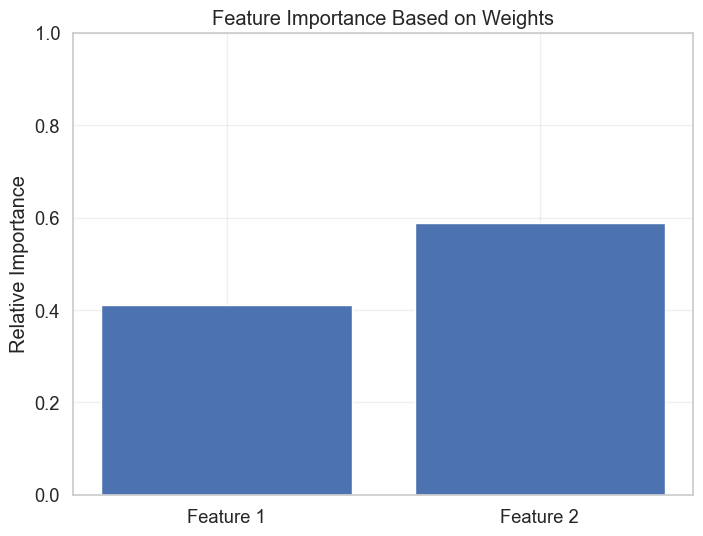

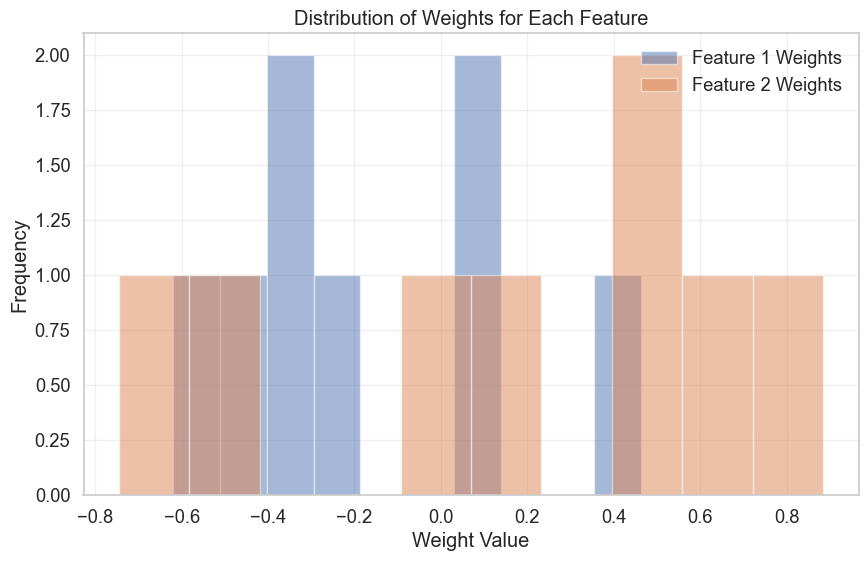


Example pseudocode for gradient-based saliency maps:

    def compute_saliency_map(model, X, y_true, activation_function, 
                           activation_derivative, output_activation, 
                           output_activation_derivative):
        # Forward pass
        y_pred, cache = model.forward(X, activation_function, output_activation)
        
        # Initial gradient at the output
        dout = np.zeros_like(y_pred)
        
        # Set gradient for the correct class to 1
        for i in range(len(y_true)):
            dout[i, np.argmax(y_true[i])] = 1
        
        # Backpropagate to the input
        activations = cache['activations']
        pre_activations = cache['pre_activations']
        
        # Loop through layers backwards
        for layer in reversed(range(len(model.weights))):
            # Apply activation gradient
            if layer == len(model.weights) - 1:
                dout = dout * output_activation_derivative(pre_activations[layer

In [48]:

def visualize_feature_importance():
    """Visualize feature importance by analyzing weights"""
    # Generate data
    X, y = generate_data('moons', n_samples=500)
    y = y.reshape(-1, 1)
    
    # Create and train a simple neural network
    nn = NeuralNetwork([2, 8, 1])
    nn.fit(
        X, y,
        epochs=300,
        batch_size=32,
        learning_rate=0.01,
        activation_function=tanh,
        activation_derivative=tanh_derivative,
        output_activation=sigmoid,
        output_activation_derivative=sigmoid_derivative,
        loss_function=binary_cross_entropy,
        verbose=False
    )
    
    # Analyze first layer weights
    input_weights = nn.weights[0]  # Shape: (2, 8)
    
    # Compute feature importance based on weight magnitudes
    feature_importance = np.sum(np.abs(input_weights), axis=1)
    feature_importance = feature_importance / np.sum(feature_importance)  # Normalize
    
    # Visualize feature importance
    plt.figure(figsize=(8, 6))
    plt.bar(['Feature 1', 'Feature 2'], feature_importance)
    plt.title('Feature Importance Based on Weights')
    plt.ylabel('Relative Importance')
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Visualize weight distributions for each feature
    plt.figure(figsize=(10, 6))
    plt.hist(input_weights[0, :], alpha=0.5, label='Feature 1 Weights')
    plt.hist(input_weights[1, :], alpha=0.5, label='Feature 2 Weights')
    plt.title('Distribution of Weights for Each Feature')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualize feature importance
visualize_feature_importance()

def gradient_based_saliency():
    """Implement a simple gradient-based saliency map"""
    # This is a conceptual function - in a real implementation, 
    # we would compute gradients of output with respect to input
    
    # Example of how saliency maps could be computed
    example_code = """
    def compute_saliency_map(model, X, y_true, activation_function, 
                           activation_derivative, output_activation, 
                           output_activation_derivative):
        # Forward pass
        y_pred, cache = model.forward(X, activation_function, output_activation)
        
        # Initial gradient at the output
        dout = np.zeros_like(y_pred)
        
        # Set gradient for the correct class to 1
        for i in range(len(y_true)):
            dout[i, np.argmax(y_true[i])] = 1
        
        # Backpropagate to the input
        activations = cache['activations']
        pre_activations = cache['pre_activations']
        
        # Loop through layers backwards
        for layer in reversed(range(len(model.weights))):
            # Apply activation gradient
            if layer == len(model.weights) - 1:
                dout = dout * output_activation_derivative(pre_activations[layer])
            else:
                dout = dout * activation_derivative(pre_activations[layer])
            
            # Propagate gradient to previous layer
            dout = np.dot(dout, model.weights[layer].T)
        
        # The gradient with respect to input is our saliency map
        saliency_map = np.abs(dout)
        
        return saliency_map
    """
    
    return example_code

gradient_saliency_example = gradient_based_saliency()
print("\nExample pseudocode for gradient-based saliency maps:")
print(gradient_saliency_example)



## Conclusion

This tutorial has covered the fundamentals of deep neural networks, from the basic building blocks (neurons and activation functions) to advanced topics like regularization, optimization algorithms, and interpretability. We've built a neural network from scratch, visualized its components and learning process, and explored the impact of various hyperparameters on its performance.

By understanding how neural networks work under the hood, you're better equipped to design, train, and troubleshoot deep learning models for a wide range of applications. Remember that while we've covered many important concepts, deep learning is a rapidly evolving field with ongoing research and developments. This tutorial should serve as a solid foundation for further exploration and learning.

As you continue your deep learning journey, consider exploring more specialized architectures (CNNs, RNNs, Transformers), advanced optimization techniques, and applications in computer vision, natural language processing, and other domains.

Happy deep learning!
